In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import scipy
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv('/content/drive/My Drive/datrain.csv')
test = pd.read_csv('/content/drive/My Drive/datest.csv')
submission = pd.read_csv('/content/drive/My Drive/dasubmission.csv')

In [0]:
train_id = train['id']
test_id = test['id']

In [5]:
train.head()

id            type  fiberID  ...  modelMag_r  modelMag_i  modelMag_z
0   0             QSO      601  ...   21.364187   21.020605   21.147340
1   1             QSO      788  ...   20.753925   20.693389   20.512314
2   2             QSO      427  ...   16.641249   16.660177   16.688928
3   3             QSO      864  ...   19.889798   19.758113   19.552855
4   4  STAR_RED_DWARF      612  ...   21.475342   19.487330   18.375655

[5 rows x 23 columns]

In [0]:
#train.isnull().sum()

In [7]:
train.columns = ['id', 'type', 'fiberID','psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']
train

id            type  fiberID  ...  modelMag_r  modelMag_i  modelMag_z
0            0             QSO      601  ...   21.364187   21.020605   21.147340
1            1             QSO      788  ...   20.753925   20.693389   20.512314
2            2             QSO      427  ...   16.641249   16.660177   16.688928
3            3             QSO      864  ...   19.889798   19.758113   19.552855
4            4  STAR_RED_DWARF      612  ...   21.475342   19.487330   18.375655
...        ...             ...      ...  ...         ...         ...         ...
199986  199986             QSO      568  ...   20.014046   20.061940   19.862513
199987  199987          GALAXY      362  ...   19.776321   18.990039   18.528306
199988  199988  STAR_RED_DWARF      146  ...   20.420524   18.443126   17.331724
199989  199989          GALAXY       85  ...   17.440331   17.193743   16.969854
199990  199990             QSO      964  ...   20.327396   20.217198   19.995023

[199991 rows x 23 columns]

In [0]:
#for s in ['u','g','r','i','z']:
#  plt.figure(figsize=(20,5))
#  plt.subplot(1,2,1)
#  sns.distplot(train['modelMag_%s'%(s)])
#  plt.subplot(1,2,2)
#  sns.distplot(test['modelMag_%s'%(s)])

In [9]:
sc=StandardScaler()
Mag = train[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']]
sc.fit(Mag)
Mag = sc.transform(Mag)
Mag

array([[ 0.0025216 ,  0.01773603,  0.02291327, ...,  0.02375388,
         0.02537072,  0.0296074 ],
       [ 0.00237283,  0.01307873,  0.01791595, ...,  0.01919914,
         0.02287638,  0.02485722],
       [ 0.00207141, -0.01253019, -0.01354196, ..., -0.0114961 ,
        -0.00786853, -0.00374278],
       ...,
       [ 0.00255625,  0.0207649 ,  0.01517774, ...,  0.01671078,
         0.00572278,  0.00106551],
       [ 0.00235099,  0.0121336 ,  0.01282583, ..., -0.0055321 ,
        -0.00380119, -0.00164138],
       [ 0.00230489,  0.00930947,  0.01518949, ...,  0.01601571,
         0.01924641,  0.02098774]])

In [0]:
Mag_sc=pd.DataFrame(Mag)
Mag_sc.columns=[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']]

In [0]:
ID = train[['id', 'type', 'fiberID']]
train = pd.concat([ID, Mag_sc], axis=1)
train = pd.DataFrame(train)
train.columns=[['id', 'type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']]

In [12]:
train

id            type fiberID  ... modelMag_r modelMag_i modelMag_z
0            0             QSO     601  ...   0.023754   0.025371   0.029607
1            1             QSO     788  ...   0.019199   0.022876   0.024857
2            2             QSO     427  ...  -0.011496  -0.007869  -0.003743
3            3             QSO     864  ...   0.012750   0.015747   0.017680
4            4  STAR_RED_DWARF     612  ...   0.024583   0.013683   0.008874
...        ...             ...     ...  ...        ...        ...        ...
199986  199986             QSO     568  ...   0.013677   0.018063   0.019997
199987  199987          GALAXY     362  ...   0.011903   0.009892   0.010016
199988  199988  STAR_RED_DWARF     146  ...   0.016711   0.005723   0.001066
199989  199989          GALAXY      85  ...  -0.005532  -0.003801  -0.001641
199990  199990             QSO     964  ...   0.016016   0.019246   0.020988

[199991 rows x 23 columns]

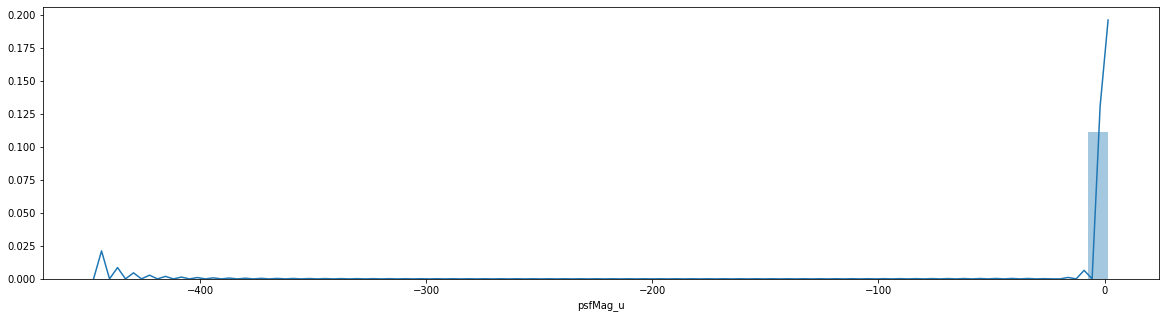

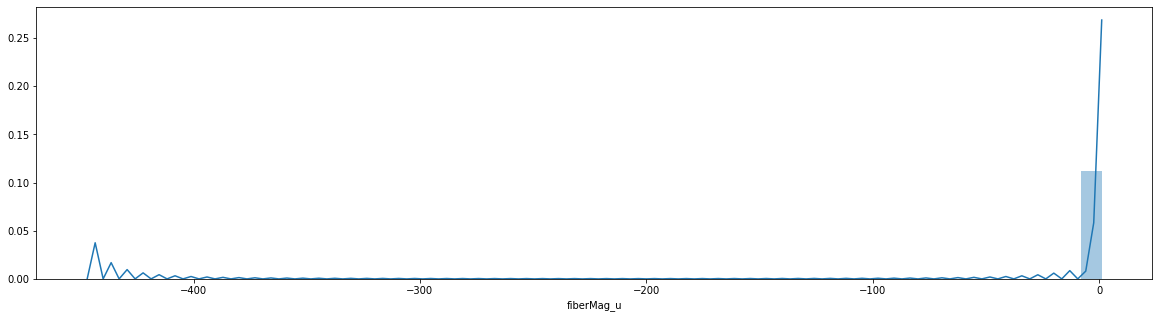

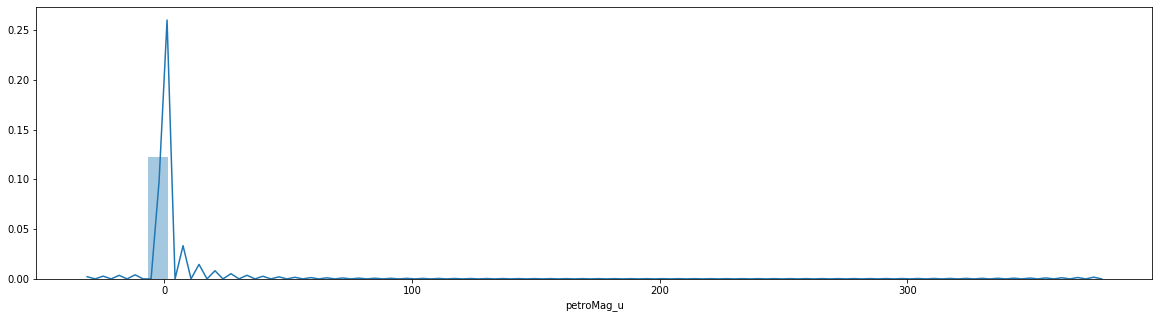

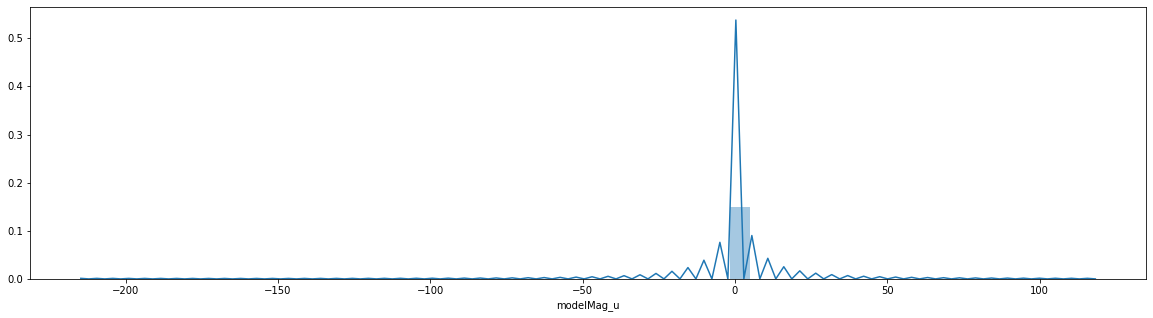

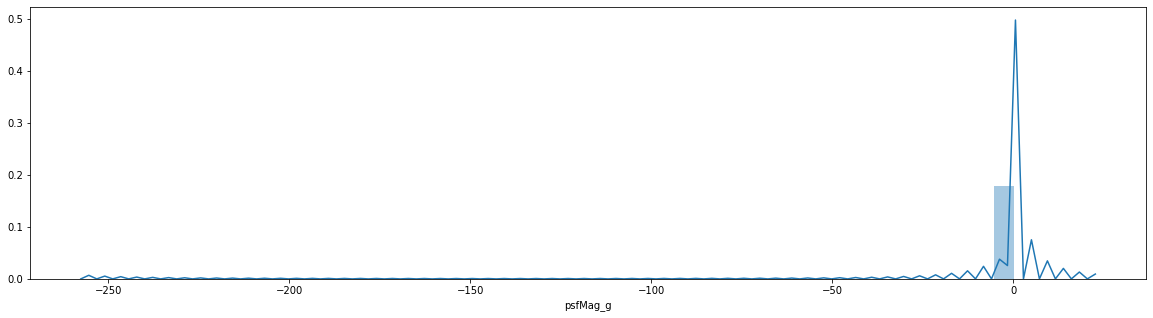

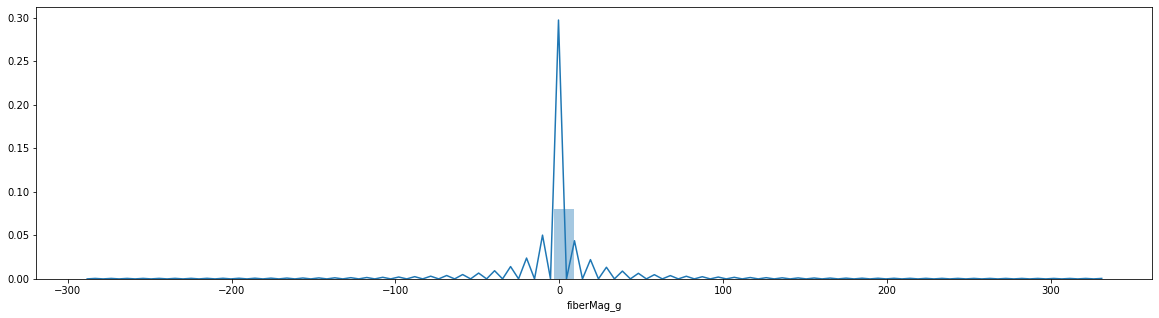

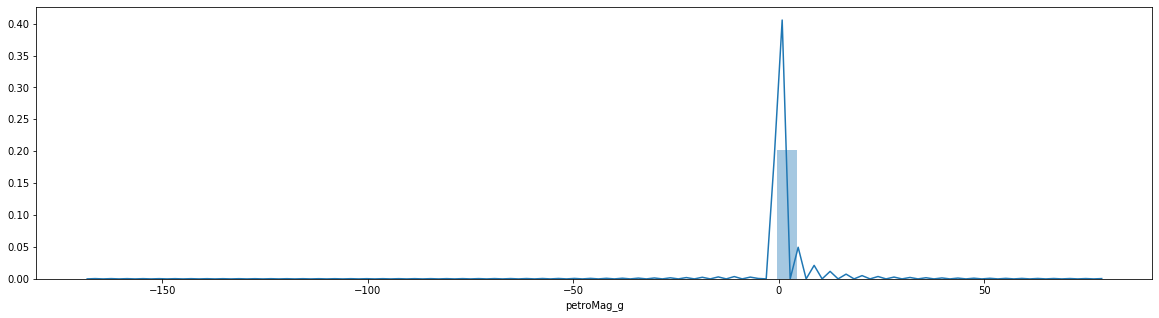

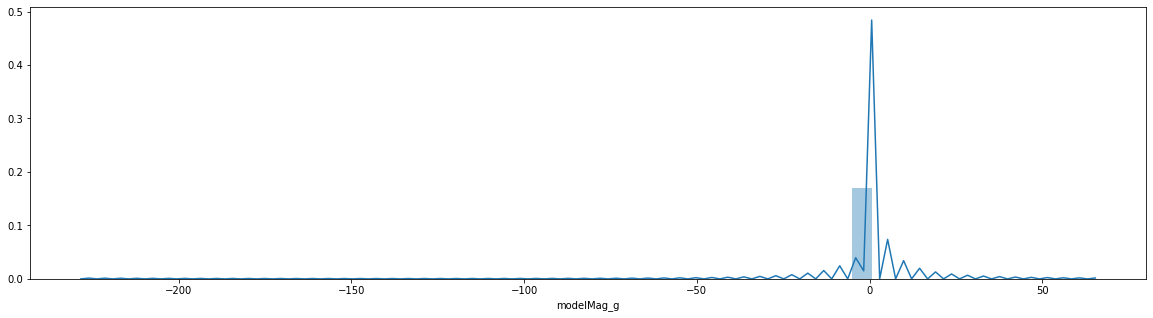

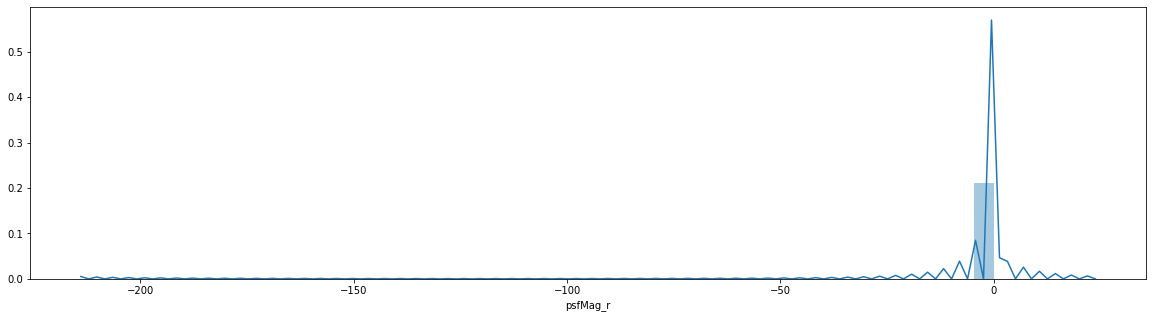

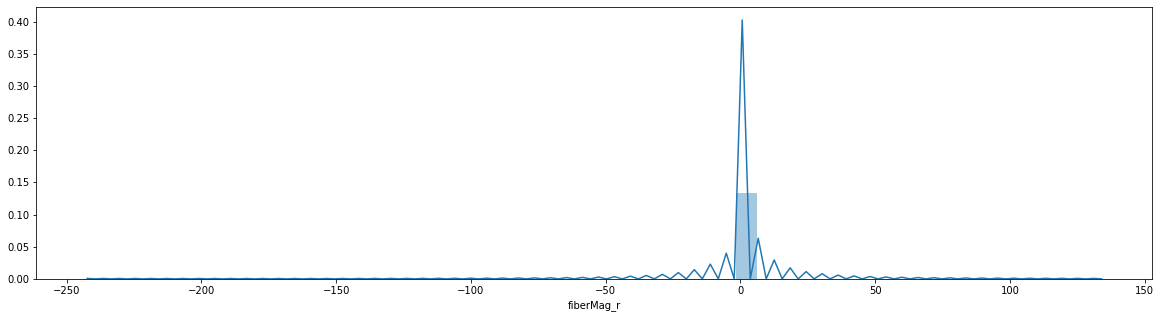

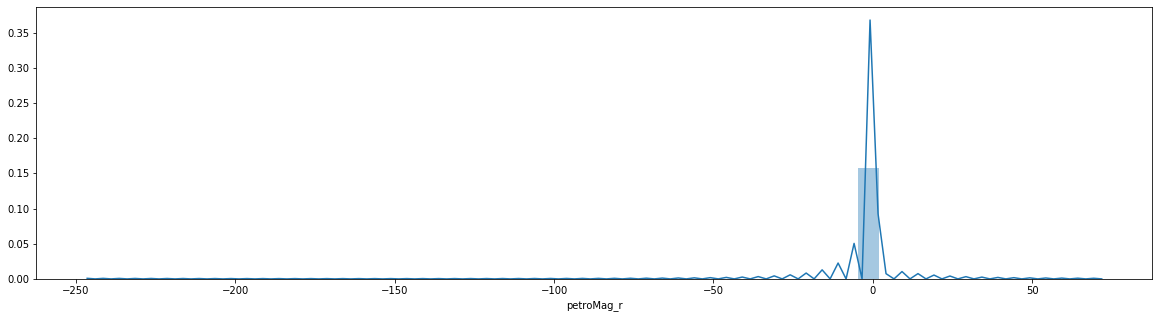

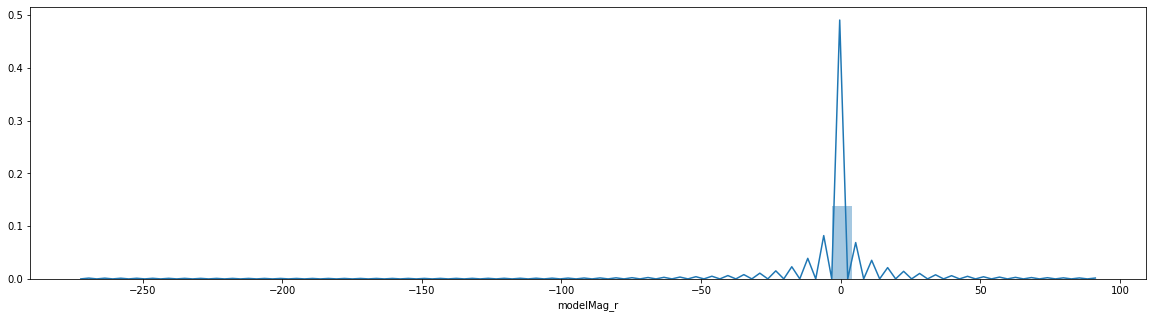

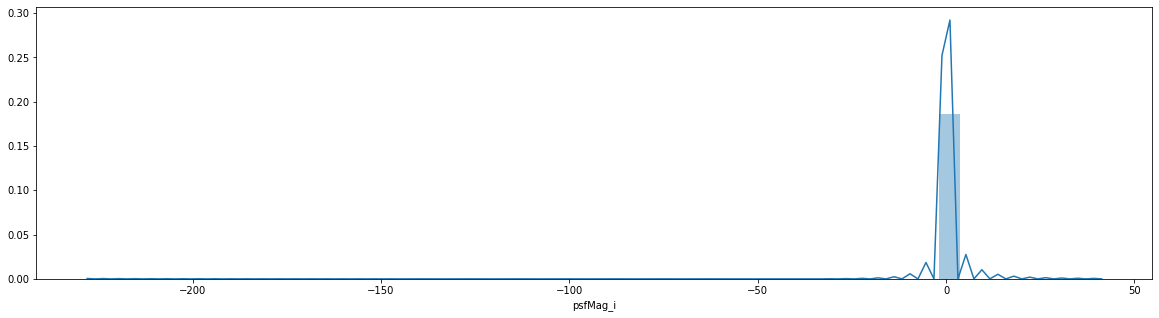

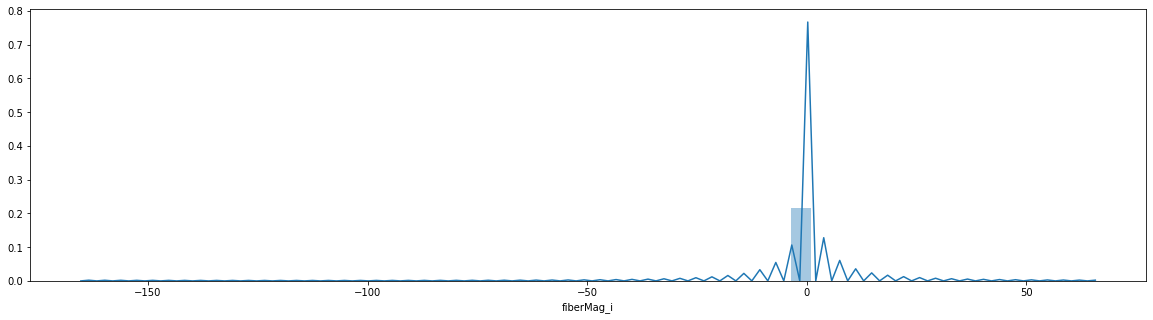

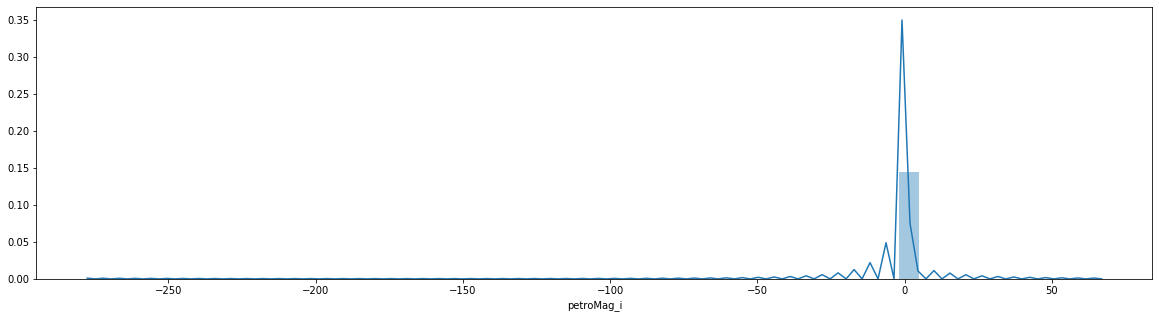

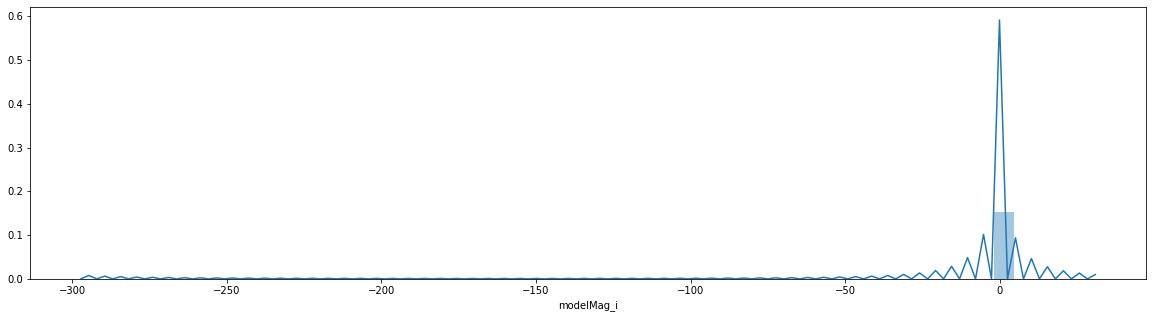

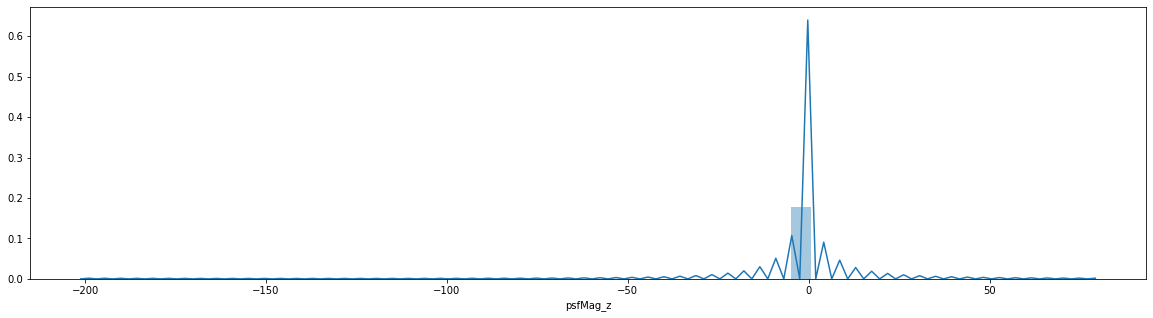

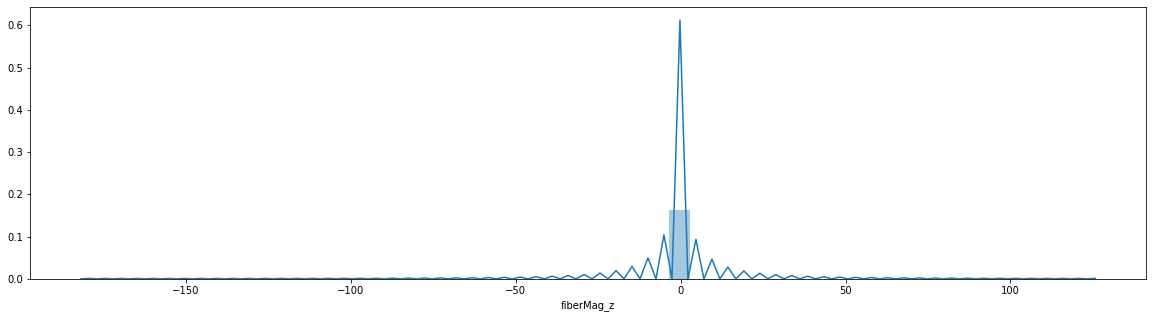

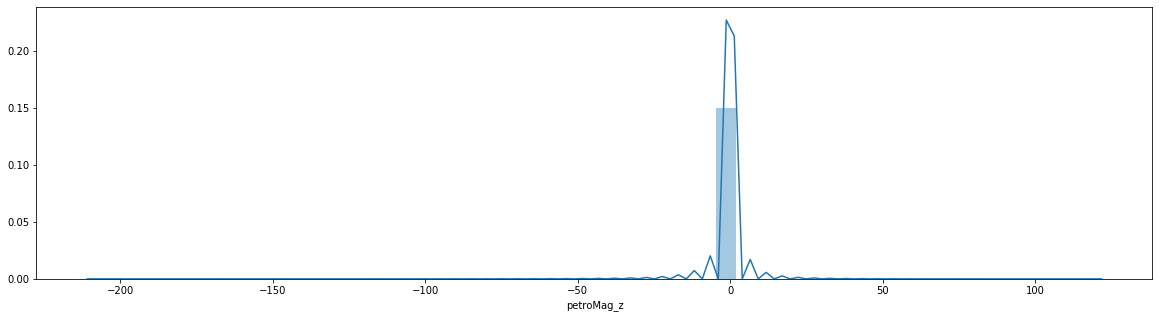

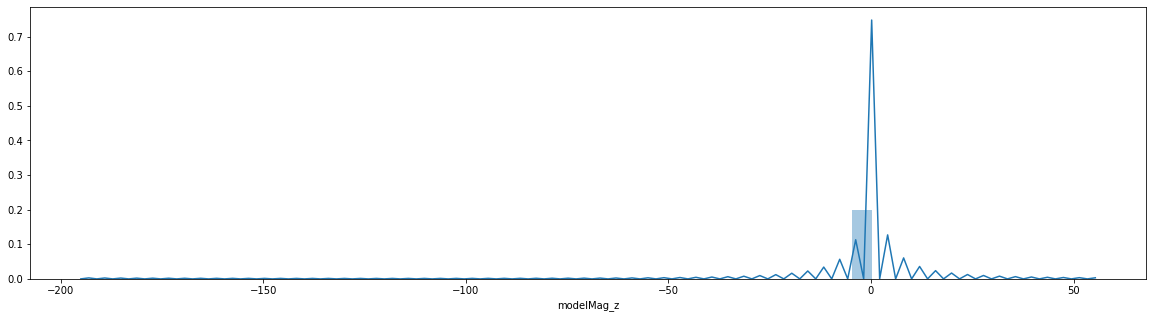

In [13]:
for s in ['u','g','r','i','z']:
  for h in ['psf', 'fiber', 'petro', 'model']:
    plt.figure(figsize=(20,5))
    plt.subplot(1,1,1)
    sns.distplot(train[["{}Mag_{}".format(h, s)]], axlabel="{}Mag_{}".format(h,s))
  

# It seems outliers are quite influential to the distributions.
### Therefore, I have decided to delete the outliers.

In [0]:
train = pd.read_csv('/content/drive/My Drive/datrain.csv')

In [15]:
train.isnull().sum()

id            0
type          0
fiberID       0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64

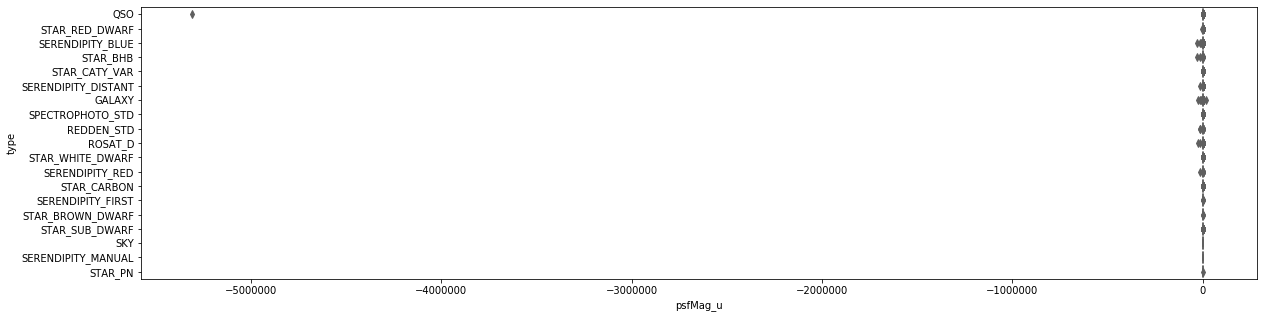

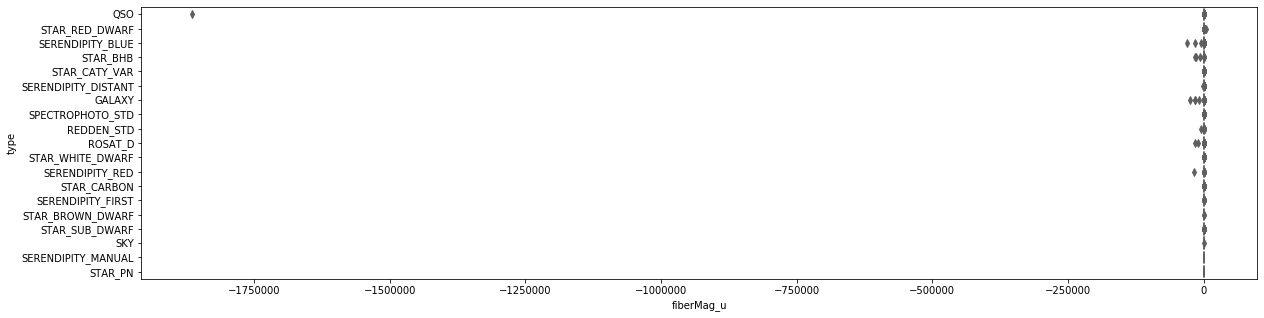

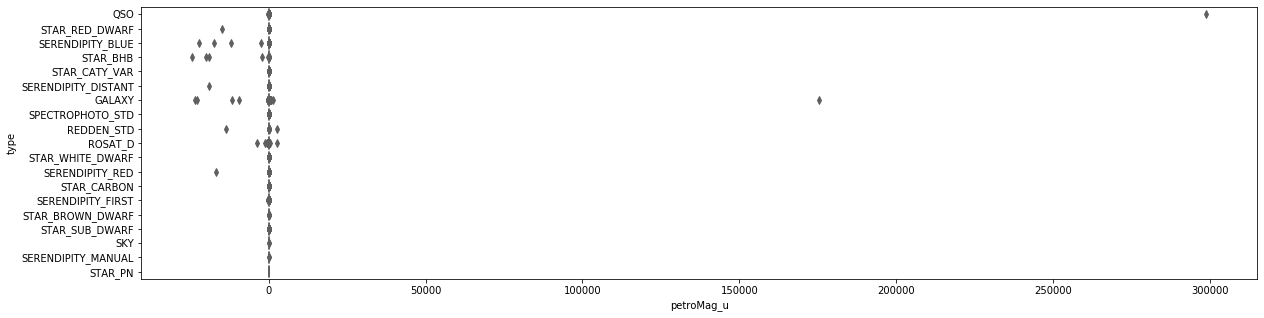

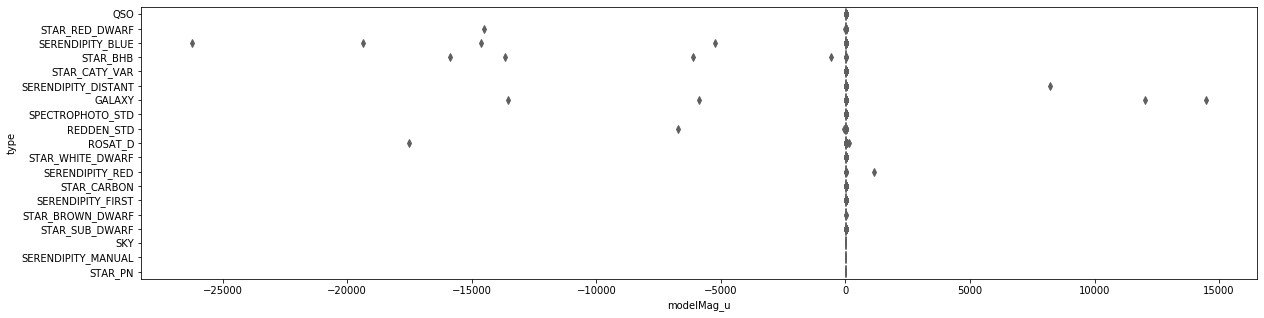

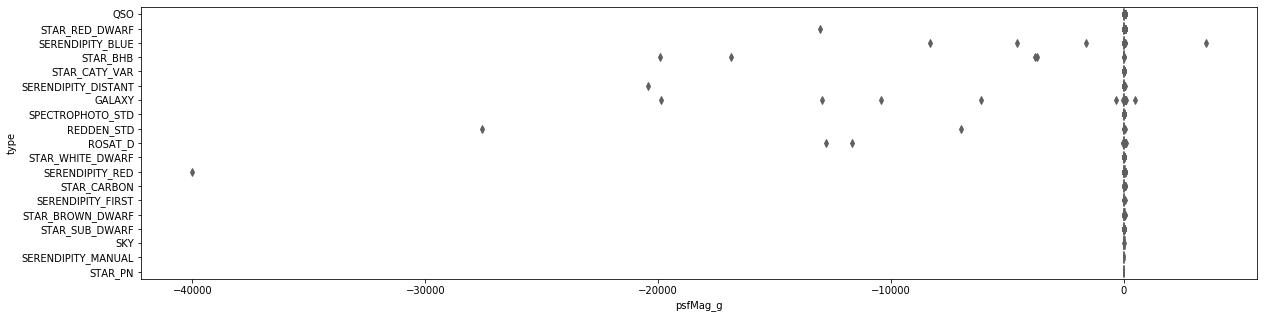

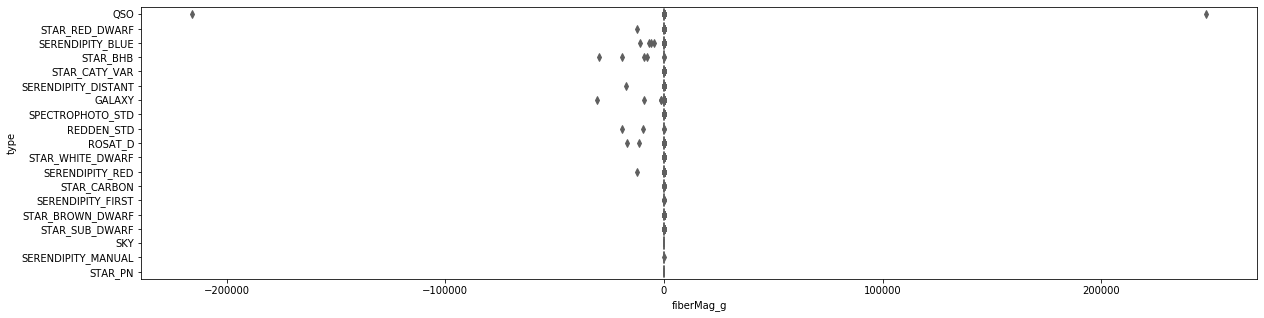

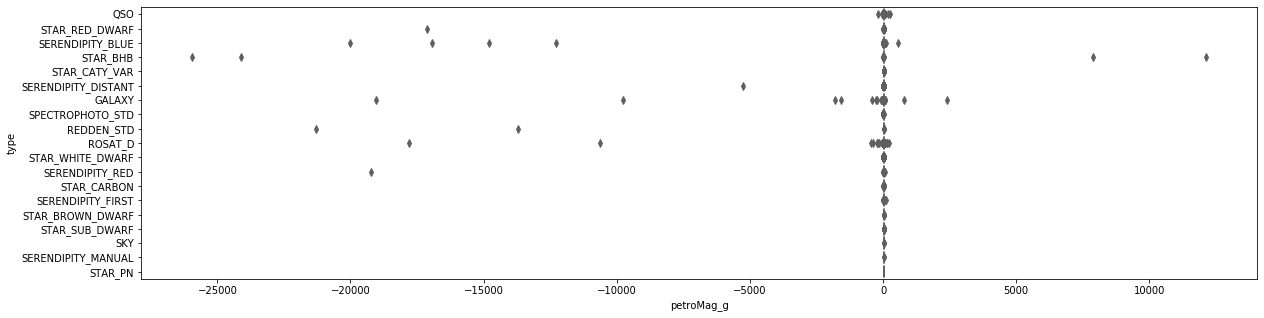

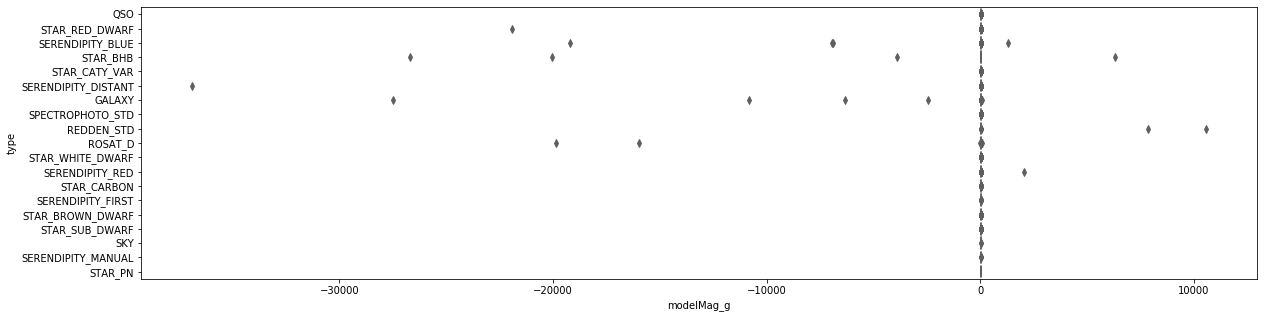

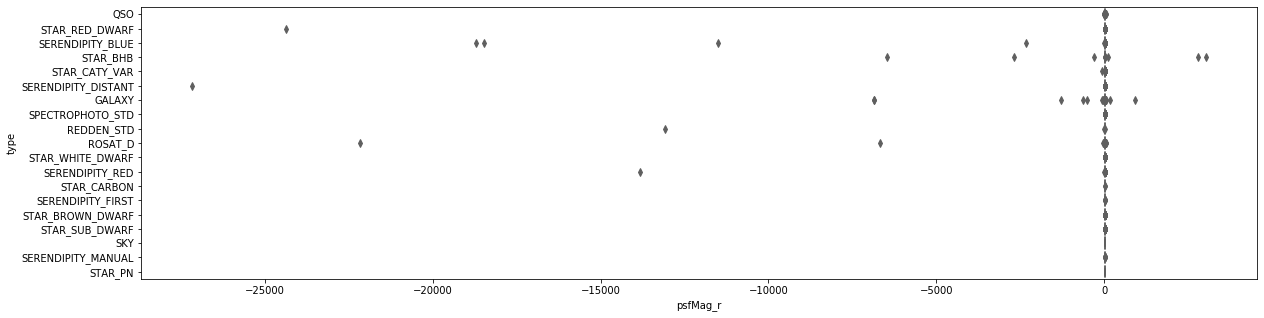

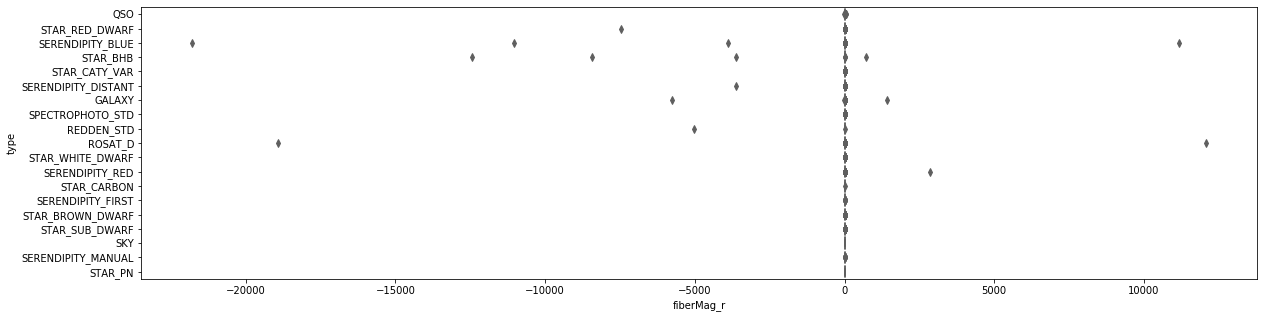

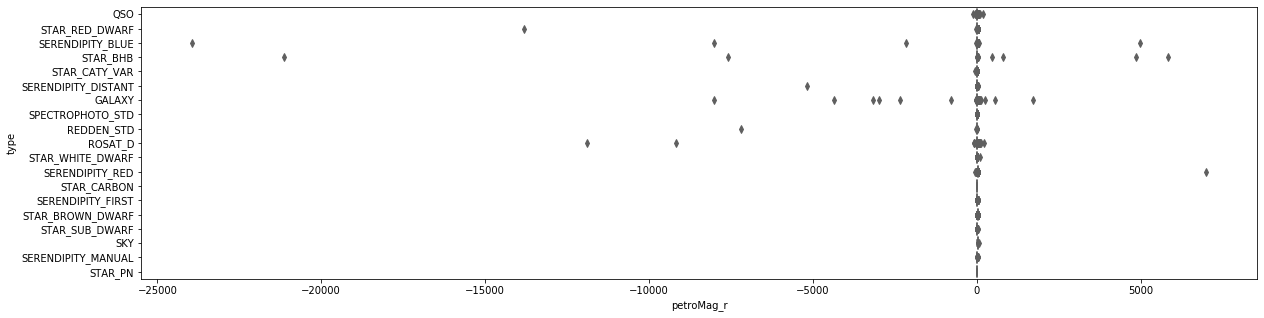

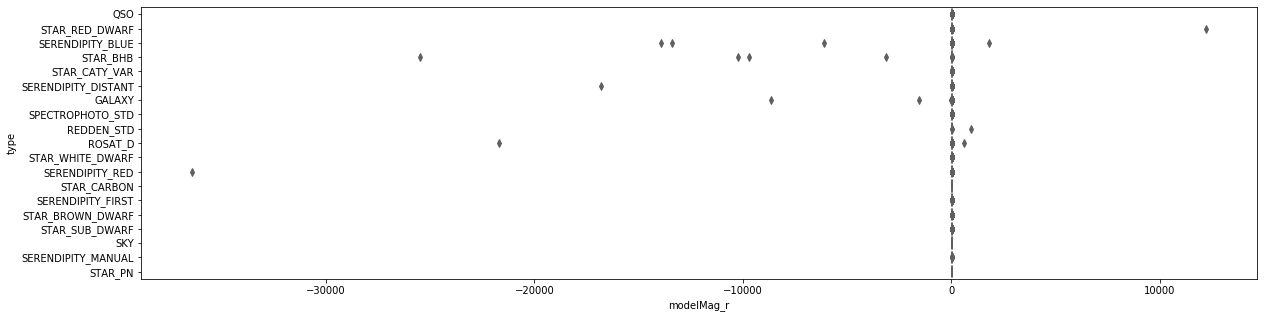

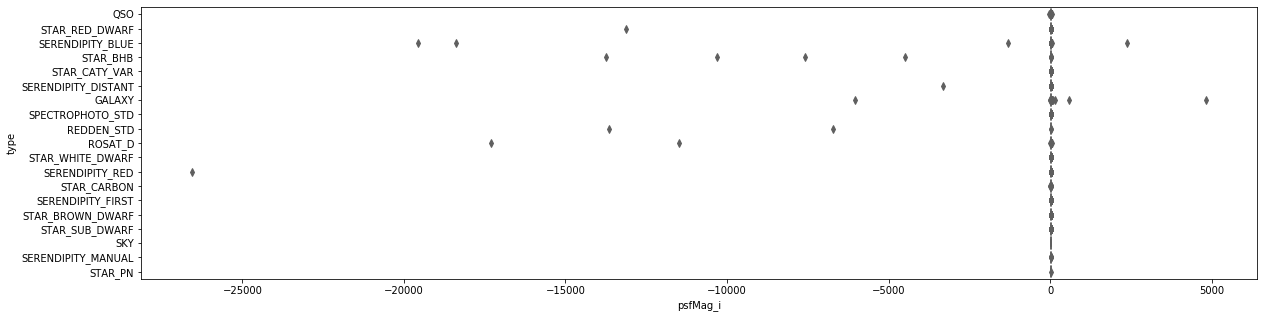

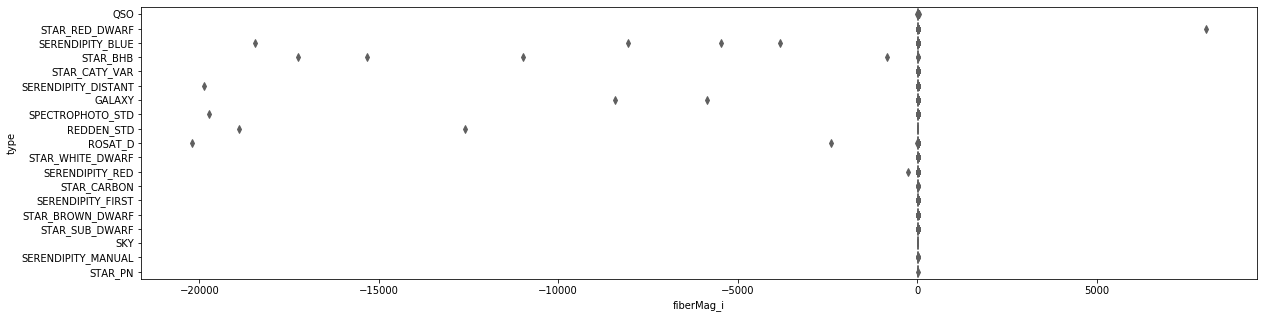

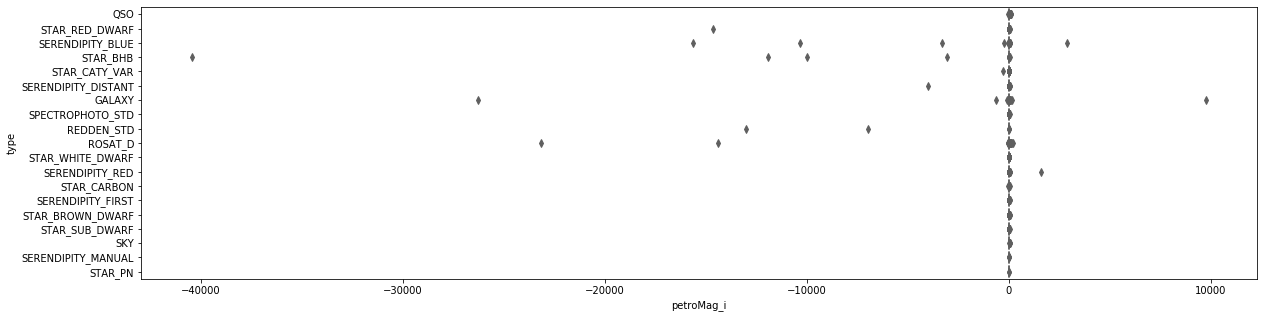

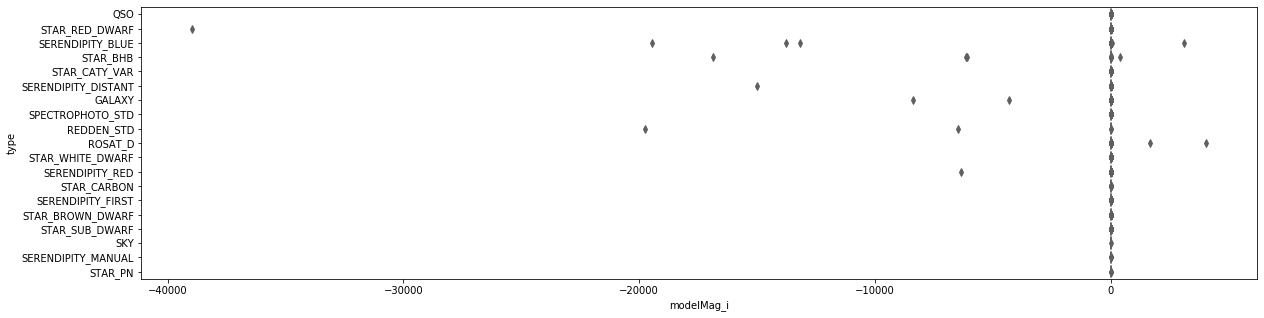

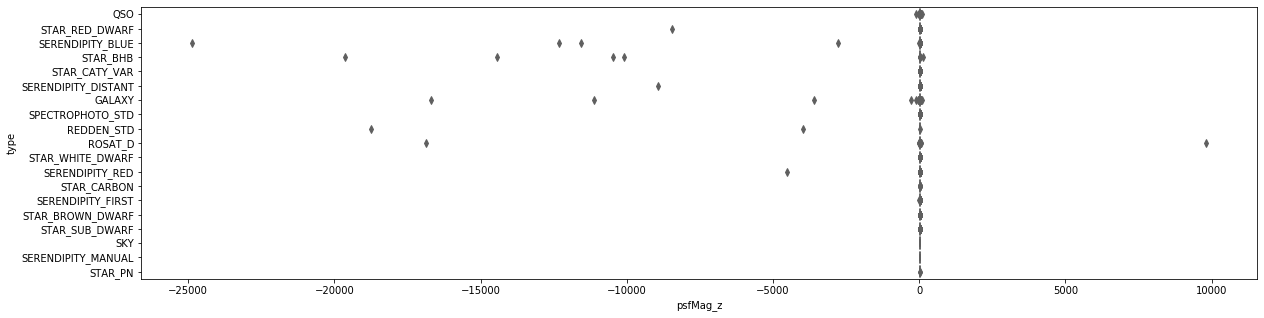

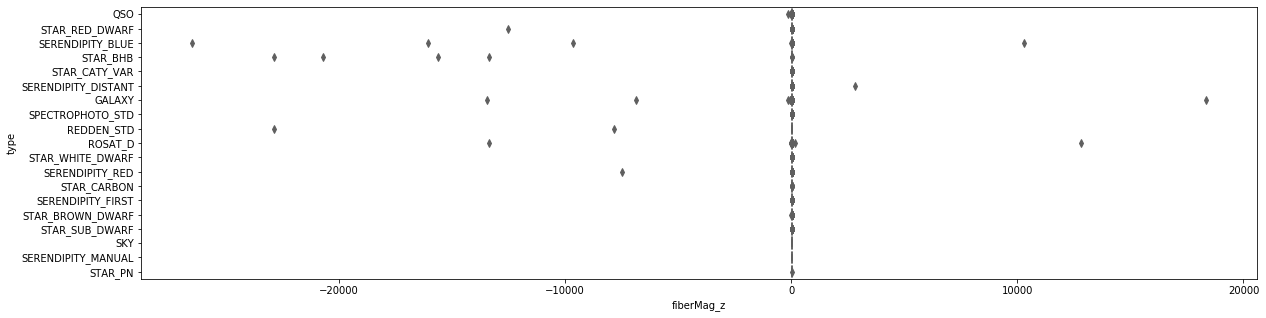

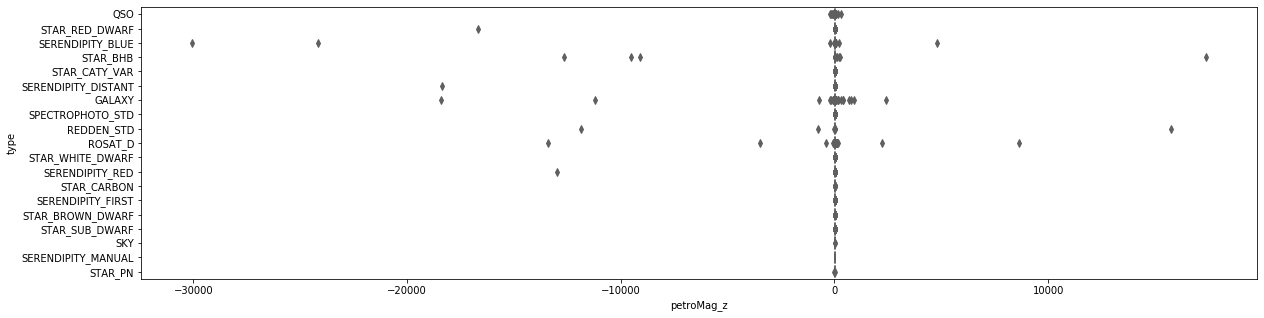

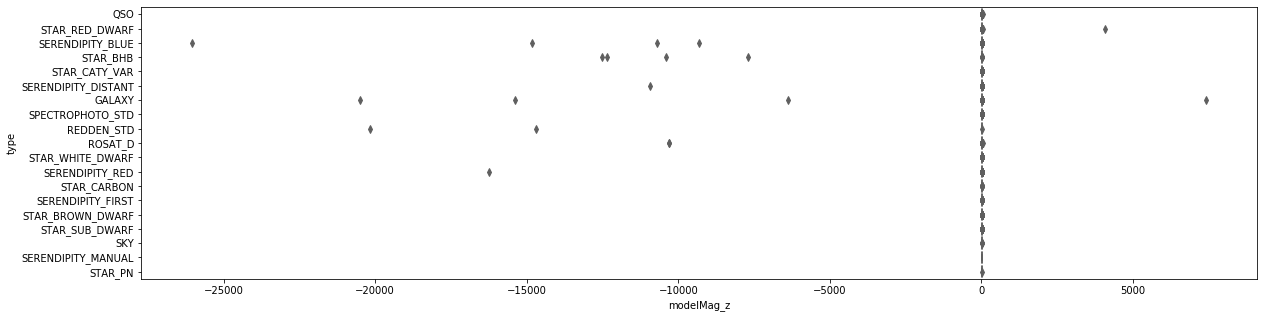

In [16]:
for s in ['u','g','r','i','z']:
  for h in ['psf', 'fiber', 'petro', 'model']:
    plt.figure(figsize=(20,5))
    plt.subplot(1,1,1)
    sns.boxplot(y="type", x="{}Mag_{}".format(h, s), data=train,palette="Set3")

In [17]:
for s in ['u','g','r','i','z']:
  for h in ['psf', 'fiber', 'petro', 'model']:
    print(train[train["{}Mag_{}".format(h, s)] < -1000]["{}Mag_{}".format(h, s)].value_counts() | train[train["{}Mag_{}".format(h, s)] > 1000]["{}Mag_{}".format(h, s)].value_counts())

-5.310802e+06     True
-3.188748e+04     True
-3.101170e+04     True
-2.373131e+04     True
-2.331414e+04     True
-1.710151e+04     True
-1.582561e+04     True
-1.549716e+04     True
-1.541715e+04     True
-1.527741e+04     True
-1.421570e+04     True
-1.312780e+04     True
-1.242488e+04     True
-1.099728e+04     True
-9.682156e+03     True
-4.985269e+03     True
-4.936962e+03     True
 2.278287e+03    False
 2.819516e+03    False
 1.877392e+04    False
Name: psfMag_u, dtype: bool
-1.864766e+06     True
-2.999408e+04     True
-2.607040e+04     True
-1.805492e+04     True
-1.669734e+04     True
-1.637564e+04     True
-1.596599e+04     True
-1.561192e+04     True
-1.550113e+04     True
-1.501157e+04     True
-1.047190e+04     True
-8.556853e+03     True
-7.264760e+03     True
-4.352196e+03     True
-4.335108e+03     True
-1.314010e+03     True
 4.870154e+03    False
Name: fiberMag_u, dtype: bool
-24463.431833      True
-23452.602514      True
-22663.828558      True
-22063.277488      

In [0]:
for s in ['u','g','r','i','z']:
  for h in ['psf', 'fiber', 'petro', 'model']:
    train.drop(train[train["{}Mag_{}".format(h, s)] < -1000]["{}Mag_{}".format(h, s)].index,axis=0,inplace=True)
    train.drop(train[train["{}Mag_{}".format(h, s)] > 1000]["{}Mag_{}".format(h, s)].index,axis=0,inplace=True)

In [19]:
train.isnull().sum()

id            0
type          0
fiberID       0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64

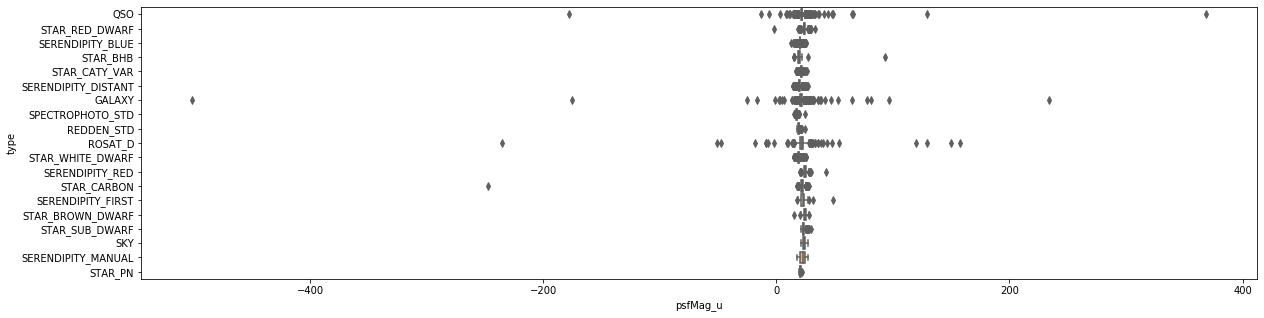

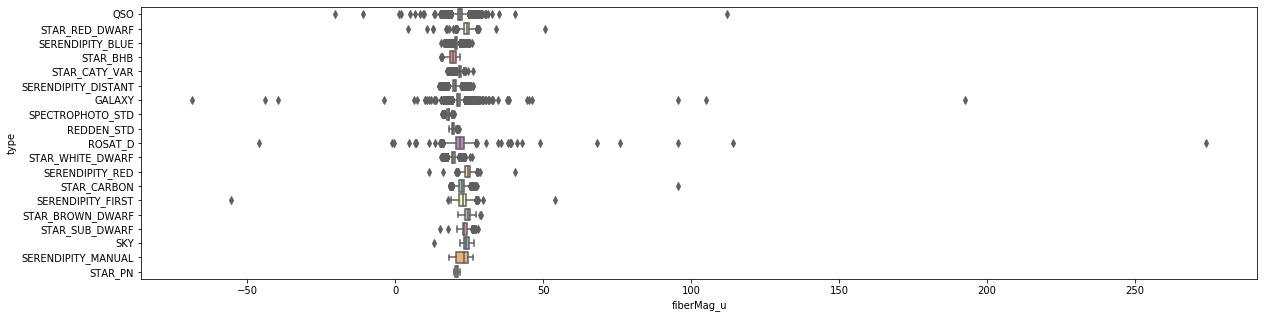

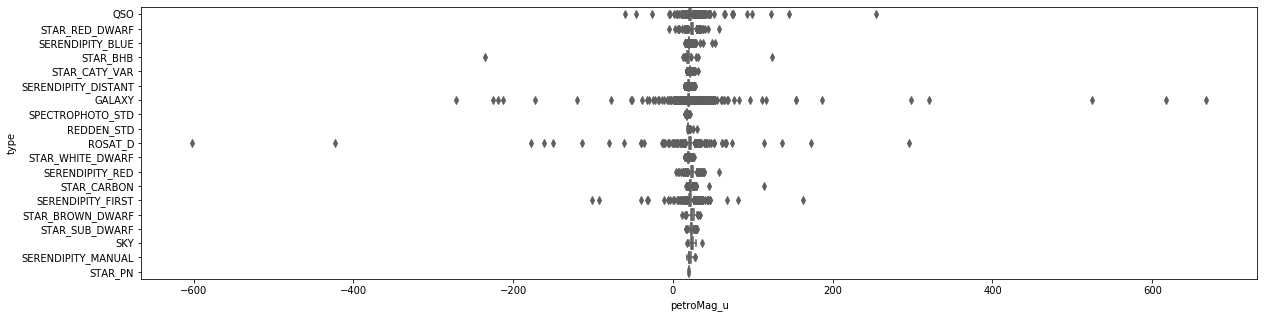

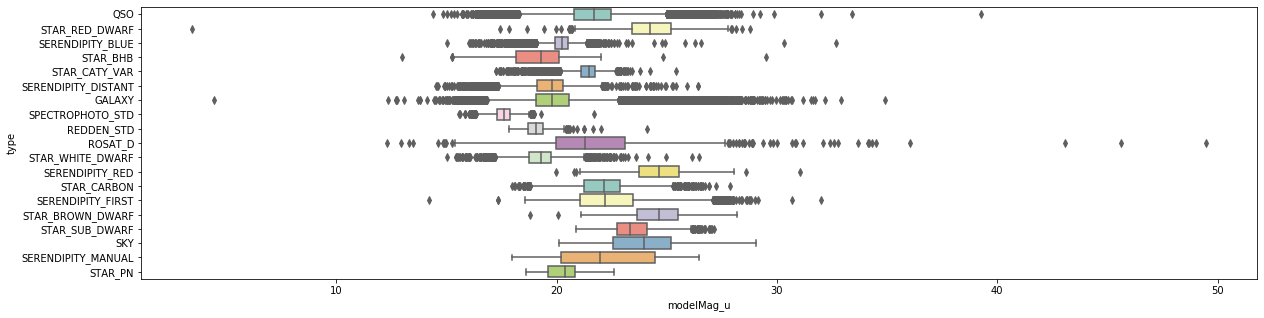

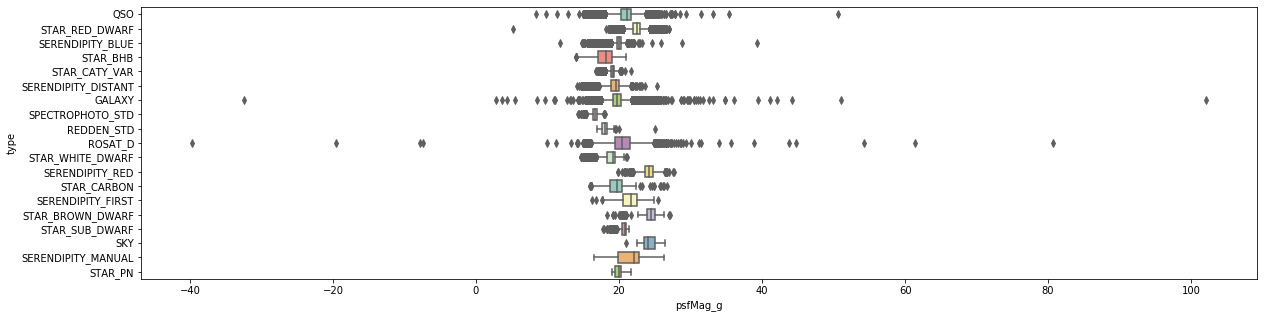

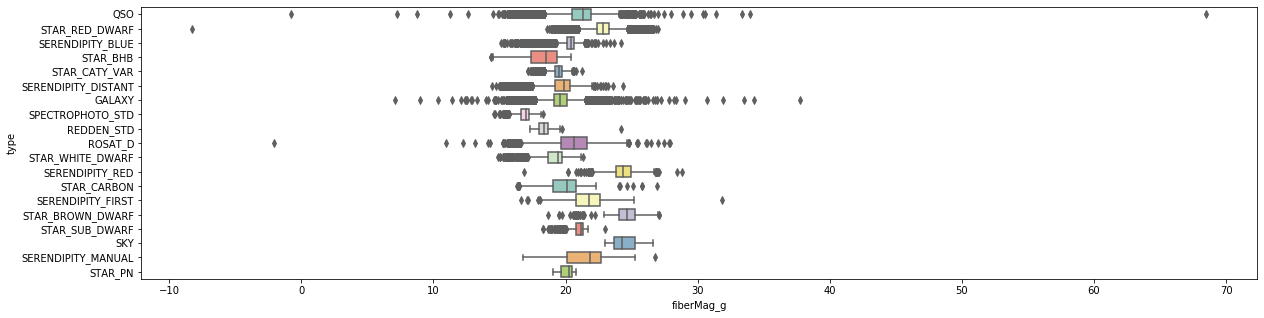

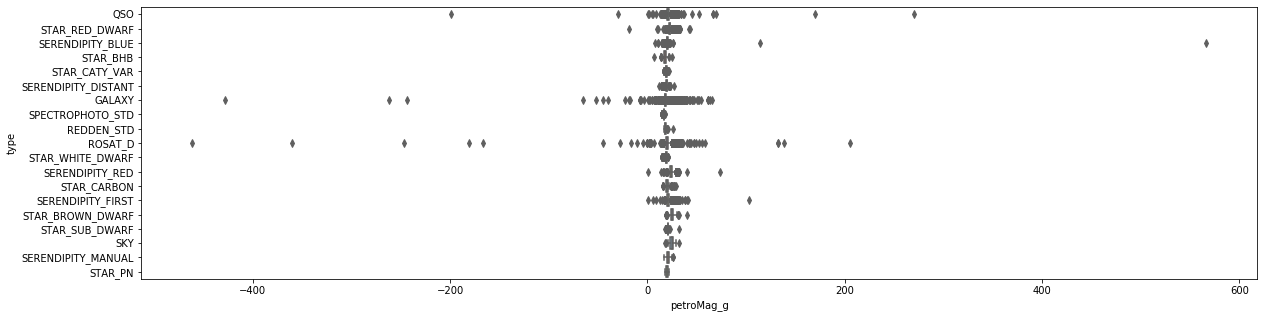

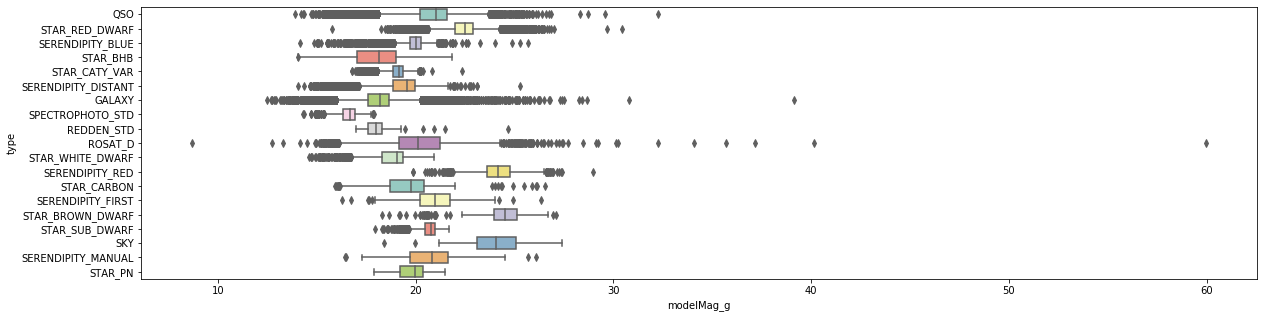

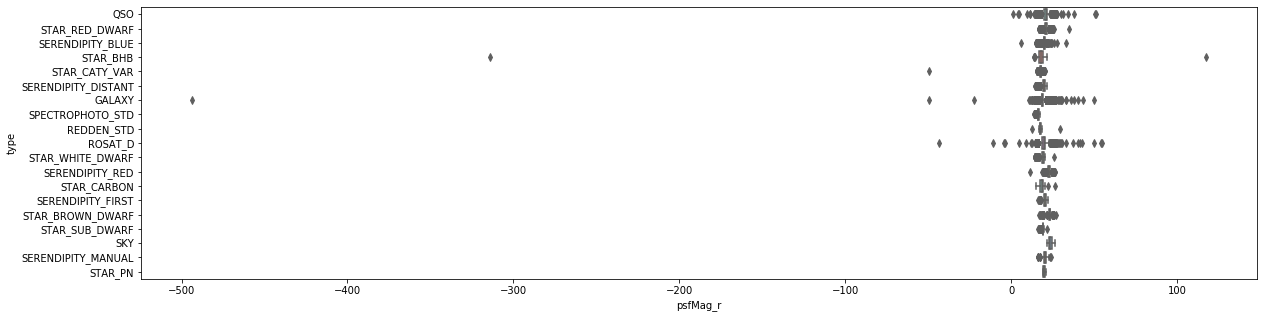

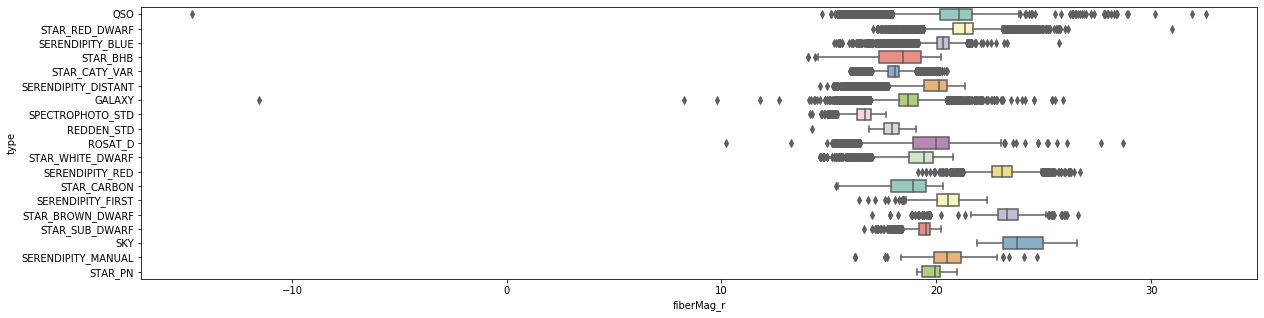

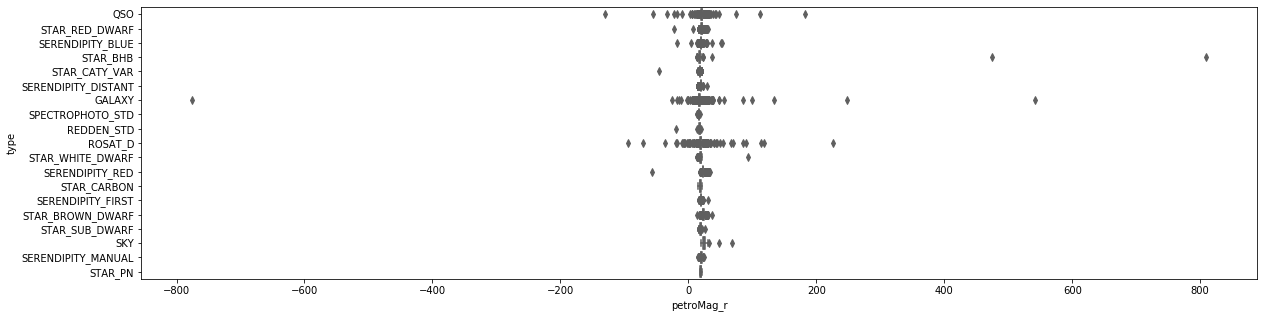

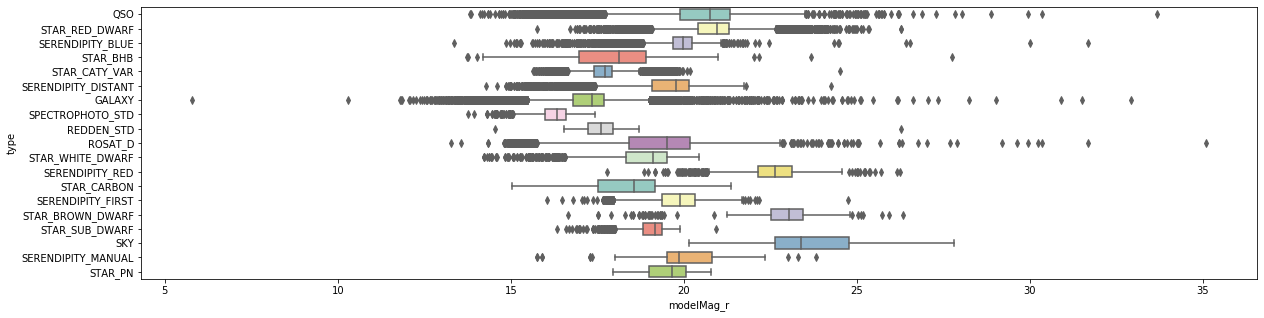

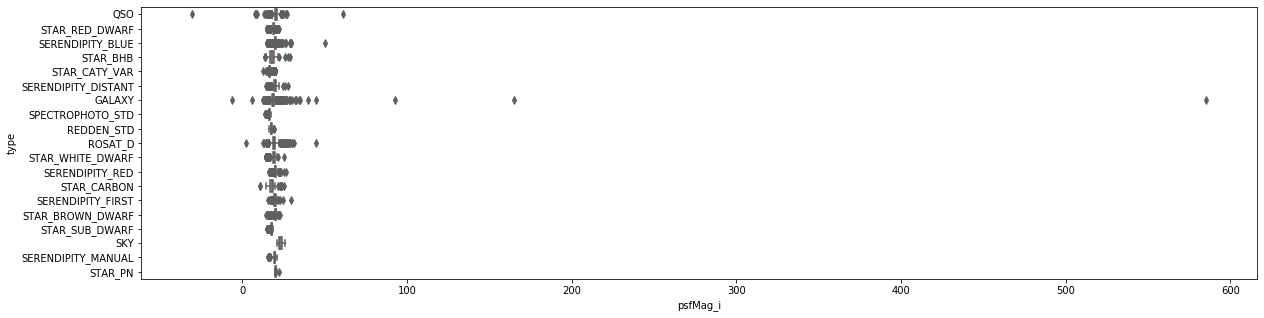

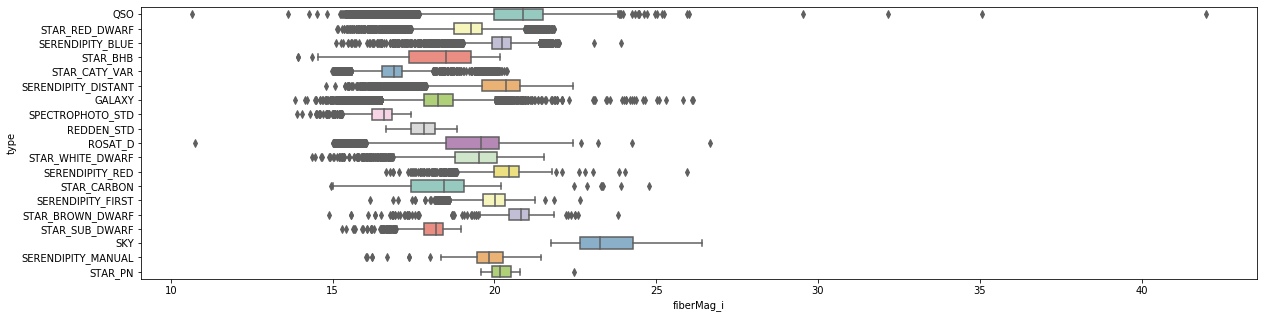

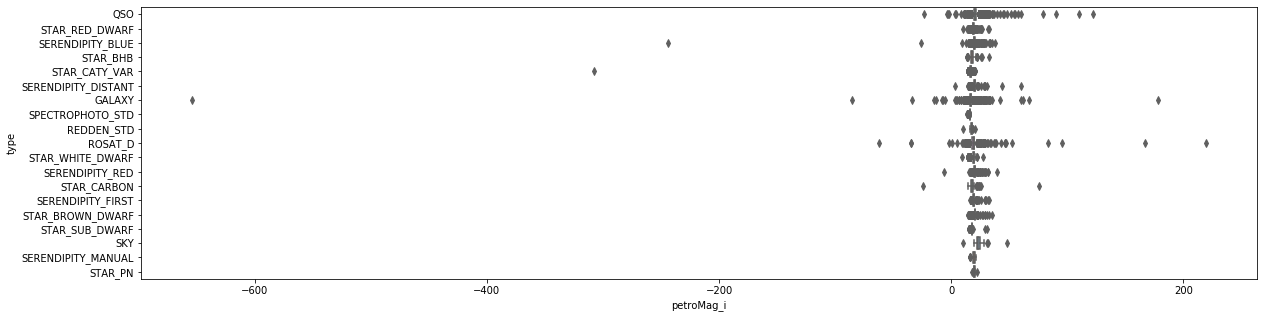

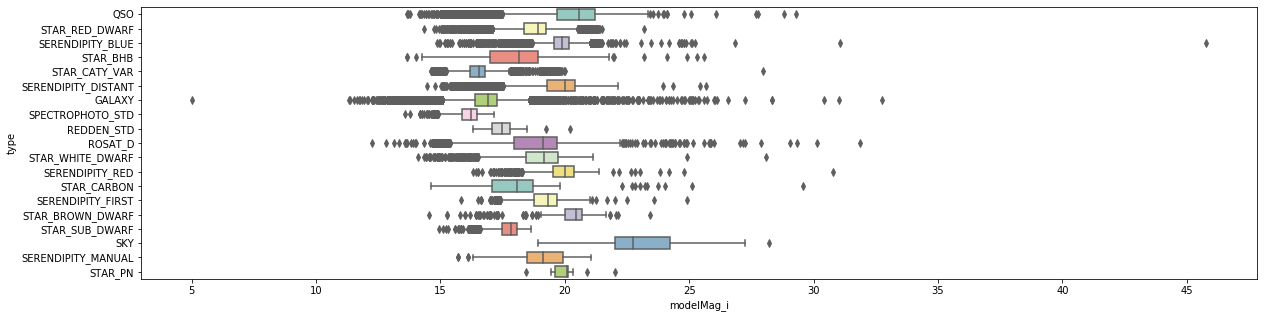

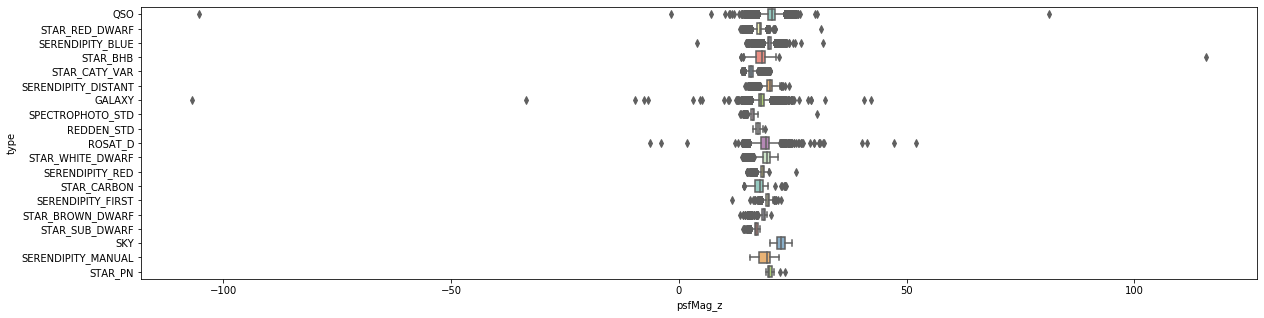

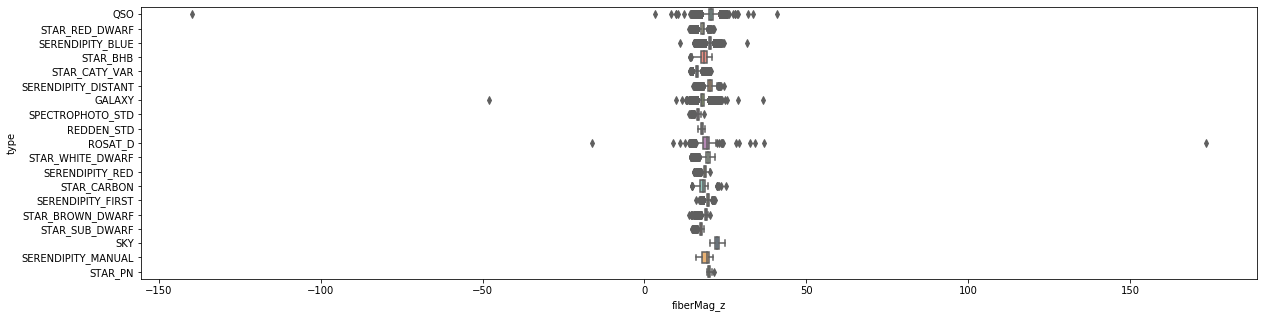

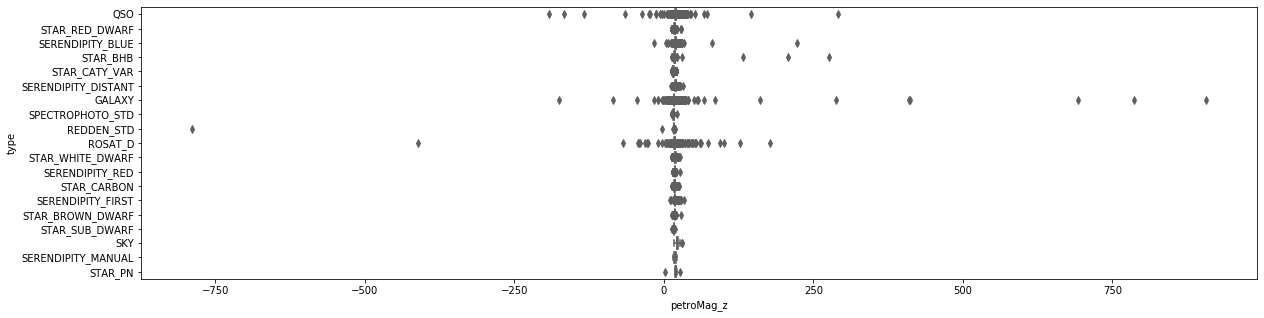

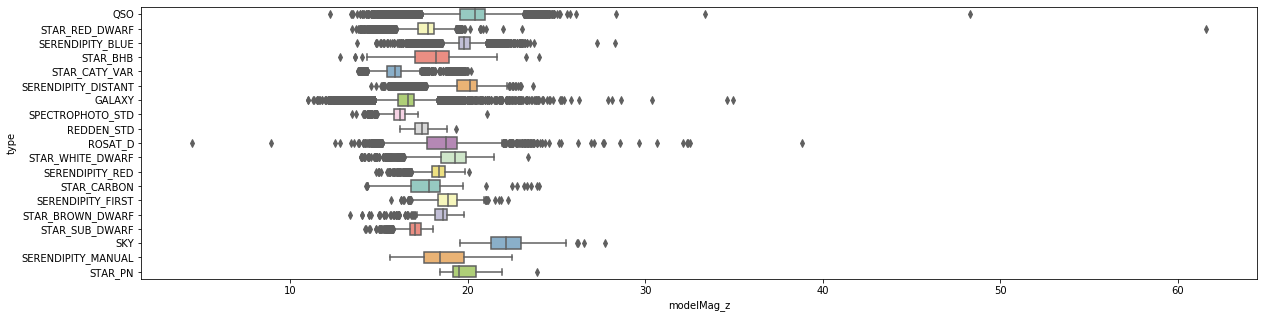

In [20]:
for s in ['u','g','r','i','z']:
  for h in ['psf', 'fiber', 'petro', 'model']:
    plt.figure(figsize=(20,5))
    plt.subplot(1,1,1)
    sns.boxplot(y="type", x="{}Mag_{}".format(h, s), data=train,palette="Set3")

In [21]:
sc=StandardScaler()
Mag = train[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']]
sc.fit(Mag)
Mag = sc.transform(Mag)
Mag

array([[ 0.77323152,  0.82546022,  0.9104917 , ...,  1.30125508,
         1.38953694,  1.53550399],
       [ 0.15619853,  0.44470025,  0.62556461, ...,  0.97356669,
         1.20762332,  1.1957173 ],
       [-1.09398936, -1.64897161, -1.16803965, ..., -1.23479142,
        -1.03461268, -0.85008215],
       ...,
       [ 0.91697277,  1.07308728,  0.46944265, ...,  0.79454227,
        -0.04339454, -0.50613813],
       [ 0.06562682,  0.36743011,  0.33534605, ..., -0.80571335,
        -0.73798056, -0.69976606],
       [-0.12557524,  0.13654238,  0.47011252, ...,  0.74453594,
         0.94288858,  0.91892775]])

In [0]:
Mag_sc=pd.DataFrame(Mag)
Mag_sc.columns=[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']]

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199958 entries, 0 to 199990
Data columns (total 23 columns):
id            199958 non-null int64
type          199958 non-null object
fiberID       199958 non-null int64
psfMag_u      199958 non-null float64
psfMag_g      199958 non-null float64
psfMag_r      199958 non-null float64
psfMag_i      199958 non-null float64
psfMag_z      199958 non-null float64
fiberMag_u    199958 non-null float64
fiberMag_g    199958 non-null float64
fiberMag_r    199958 non-null float64
fiberMag_i    199958 non-null float64
fiberMag_z    199958 non-null float64
petroMag_u    199958 non-null float64
petroMag_g    199958 non-null float64
petroMag_r    199958 non-null float64
petroMag_i    199958 non-null float64
petroMag_z    199958 non-null float64
modelMag_u    199958 non-null float64
modelMag_g    199958 non-null float64
modelMag_r    199958 non-null float64
modelMag_i    199958 non-null float64
modelMag_z    199958 non-null float64
dtypes: float64(20),

In [24]:
ID = train[['id', 'type', 'fiberID']]
ID = pd.DataFrame(ID)
train = pd.concat([ID, Mag_sc], axis=1)
train = pd.DataFrame(train)
train.columns=['id', 'type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']
train.describe()

id        fiberID  ...    modelMag_i    modelMag_z
count  199958.000000  199958.000000  ...  1.999580e+05  1.999580e+05
mean    99997.382640     360.834045  ... -6.690804e-16 -9.153396e-16
std     57733.953578     225.313600  ...  1.000003e+00  1.000003e+00
min         0.000000       1.000000  ... -7.514558e+00 -7.393434e+00
25%     49998.250000     174.000000  ... -8.579551e-01 -8.409803e-01
50%     99999.500000     349.000000  ...  6.709578e-02 -9.441608e-02
75%    149997.750000     526.000000  ...  8.048253e-01  8.250332e-01
max    199990.000000    1000.000000  ...  1.515633e+01  2.317959e+01

[8 rows x 22 columns]

In [25]:
train.isnull().sum()

id            33
type          33
fiberID       33
psfMag_u      33
psfMag_g      33
psfMag_r      33
psfMag_i      33
psfMag_z      33
fiberMag_u    33
fiberMag_g    33
fiberMag_r    33
fiberMag_i    33
fiberMag_z    33
petroMag_u    33
petroMag_g    33
petroMag_r    33
petroMag_i    33
petroMag_z    33
modelMag_u    33
modelMag_g    33
modelMag_r    33
modelMag_i    33
modelMag_z    33
dtype: int64

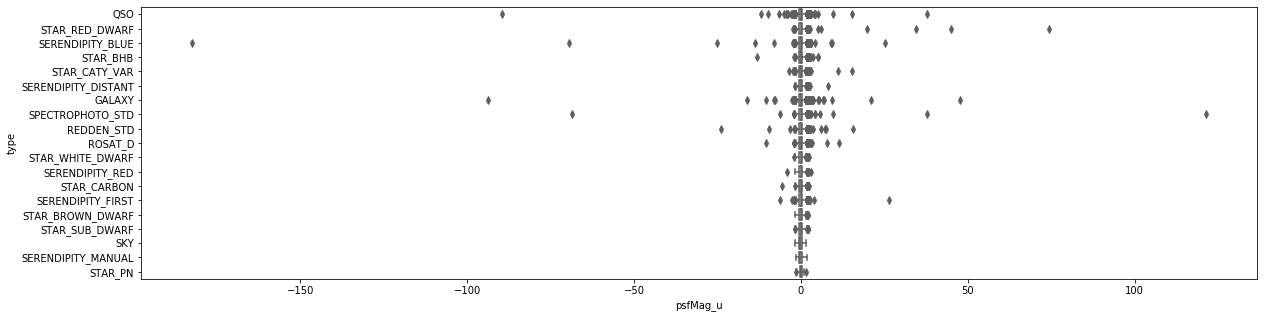

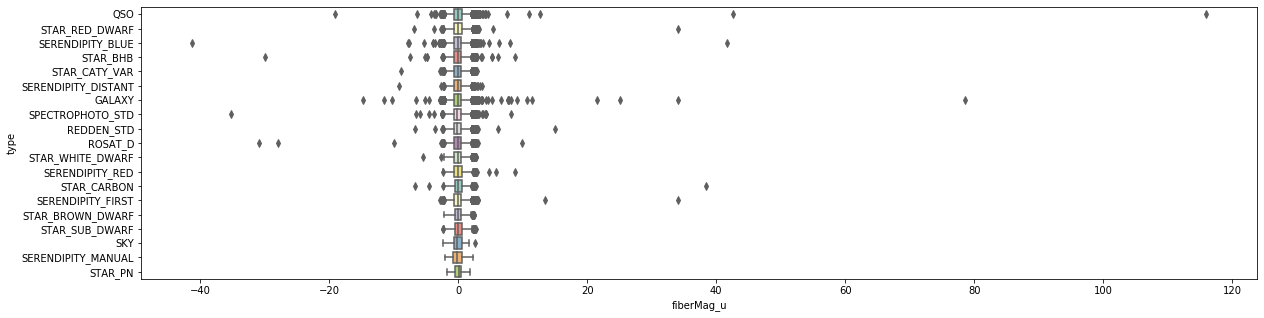

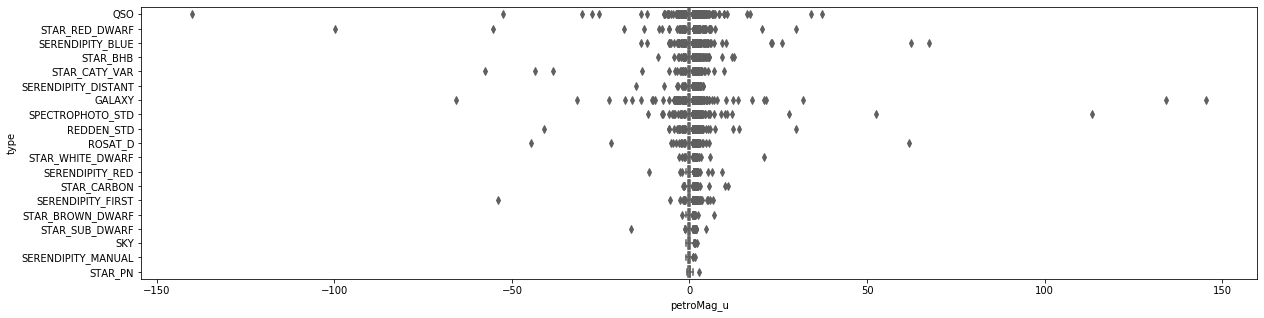

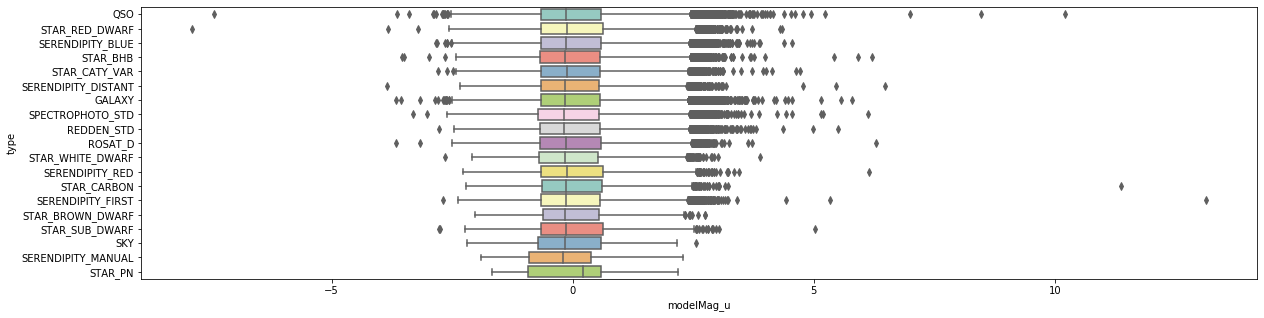

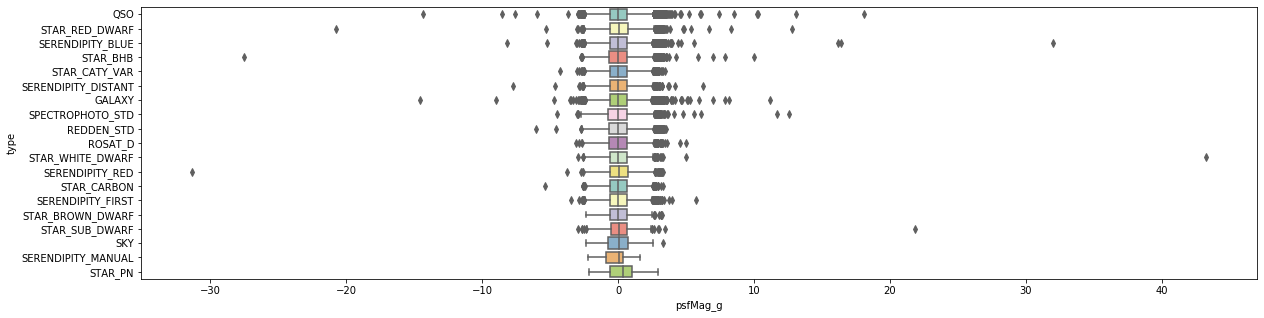

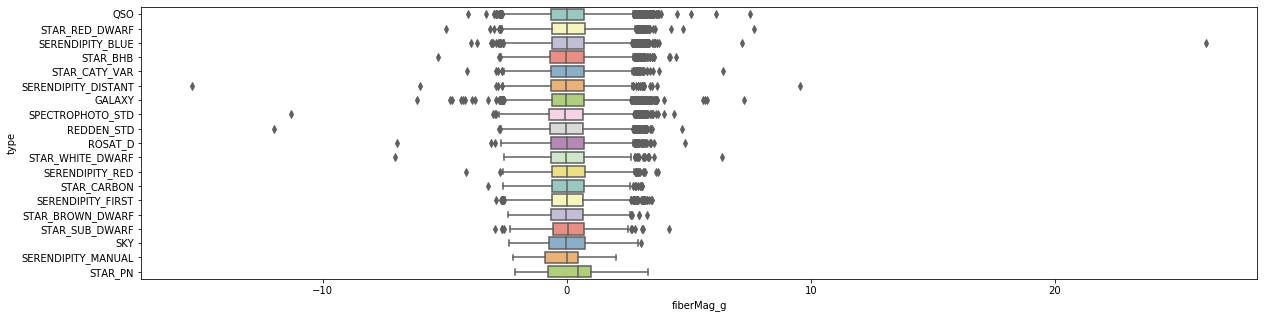

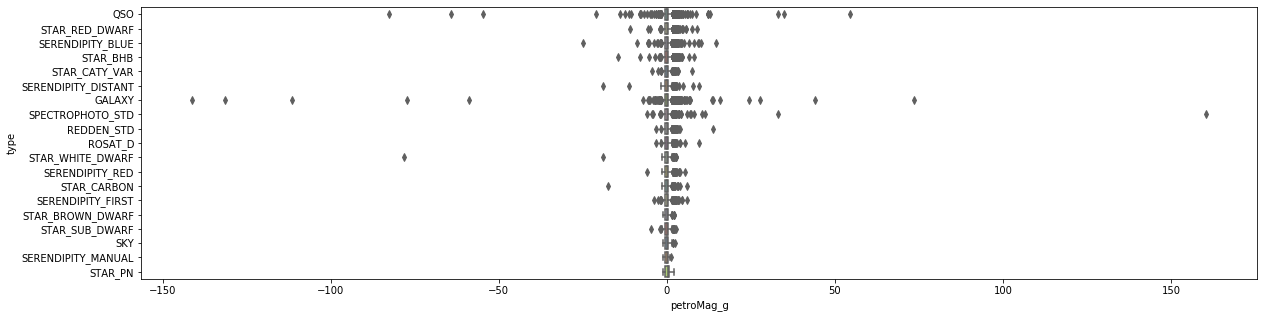

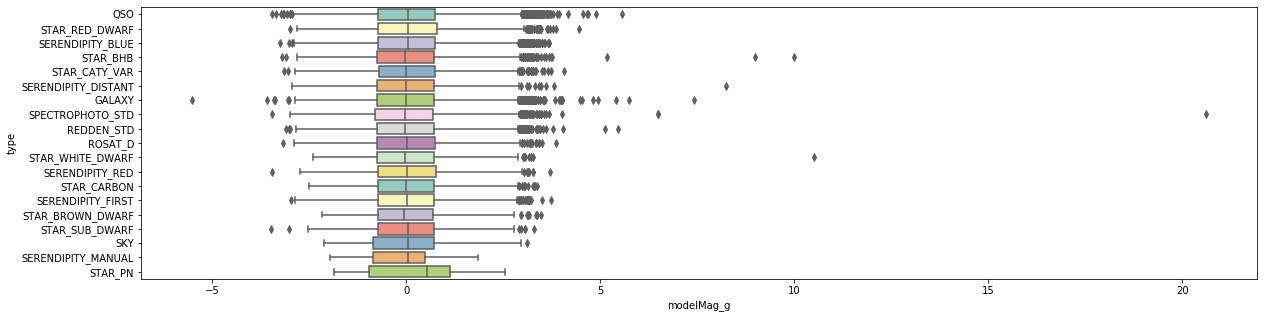

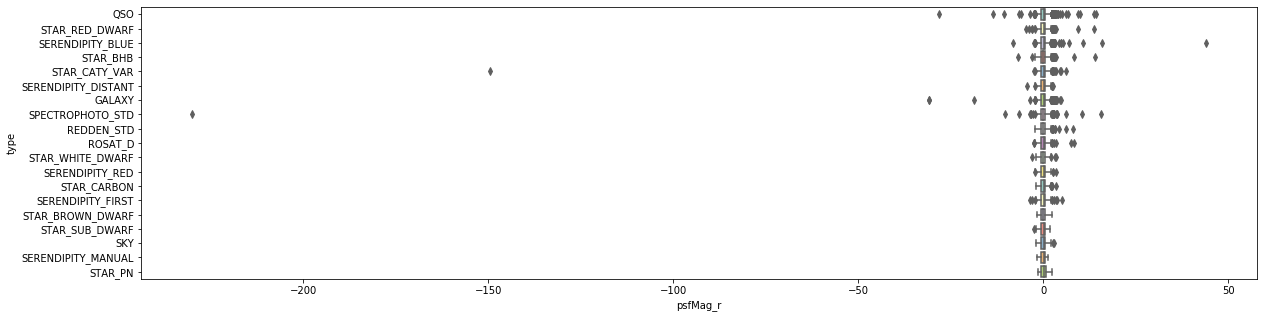

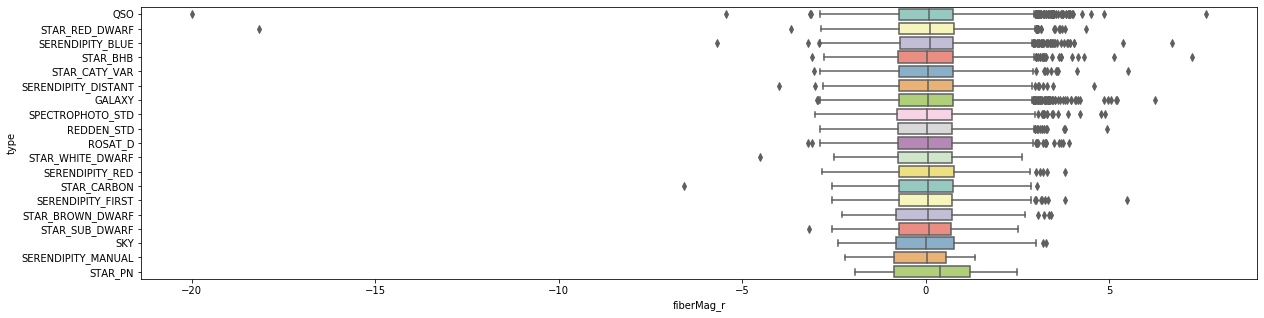

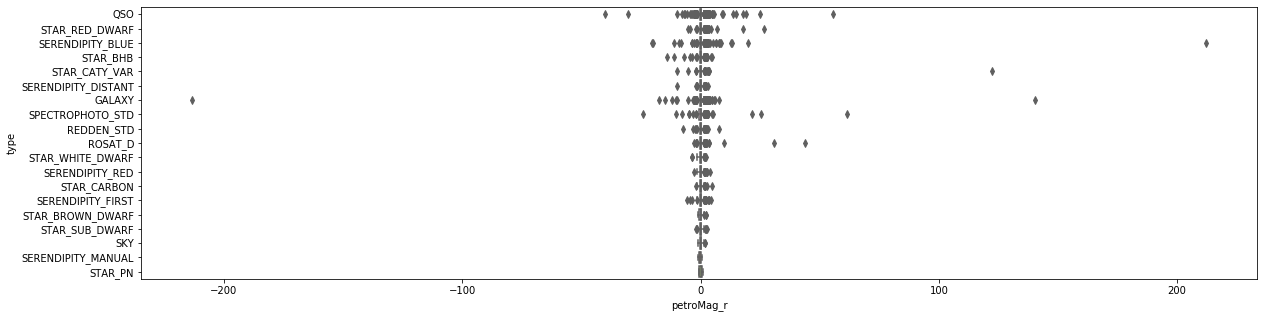

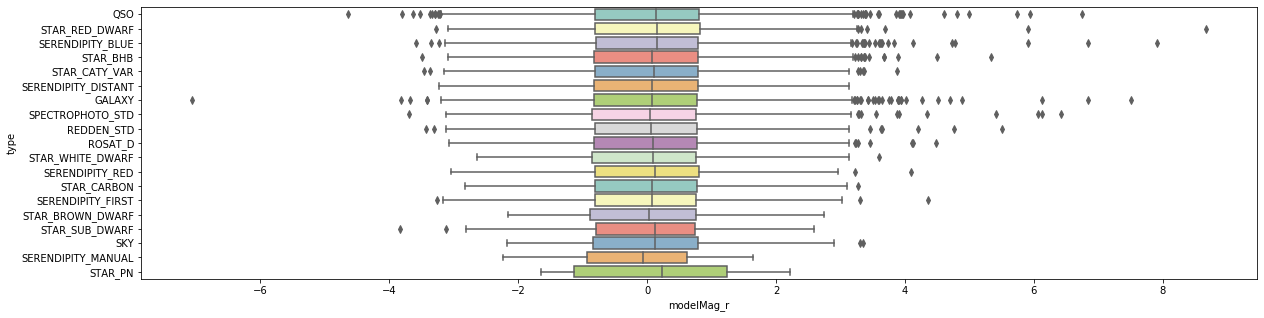

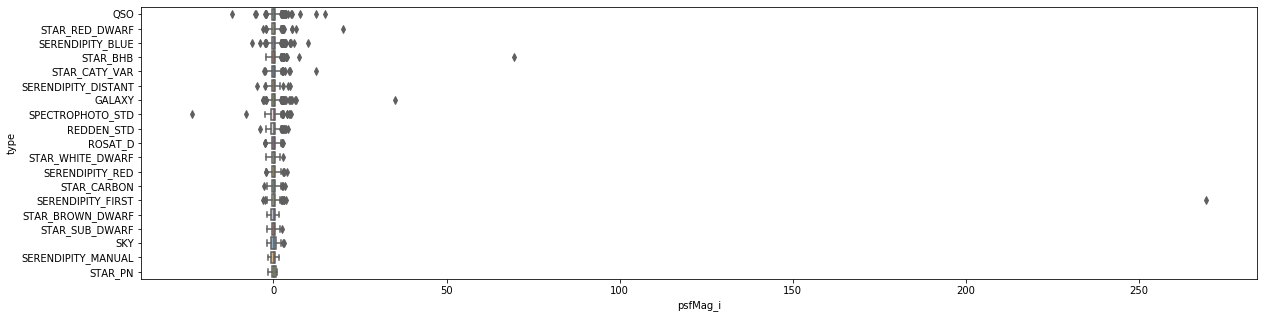

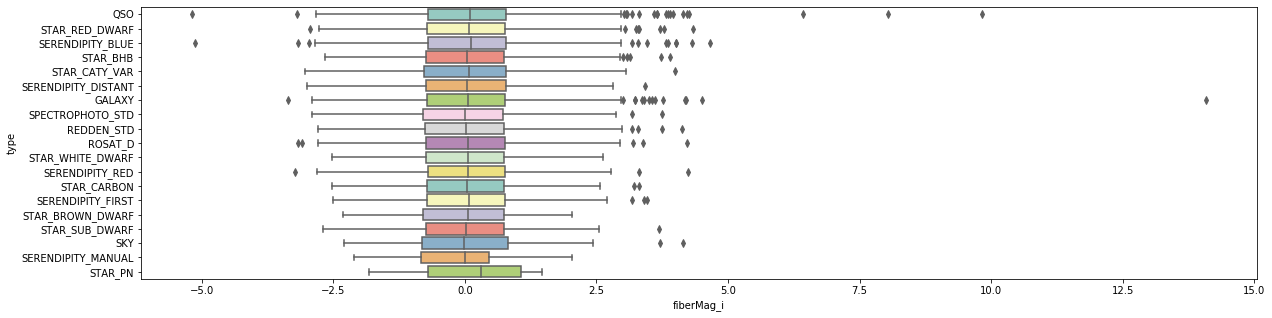

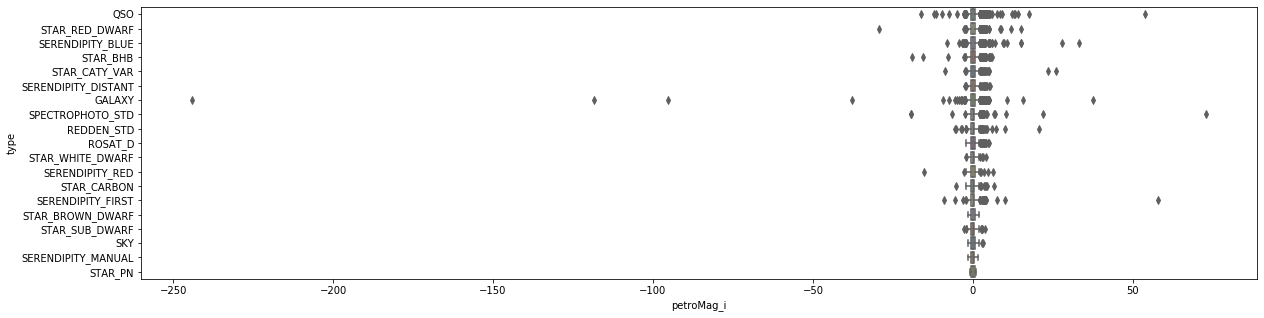

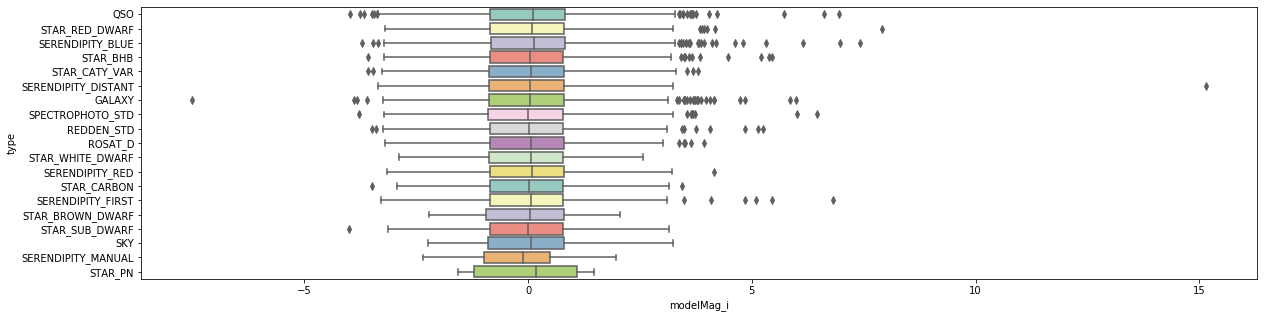

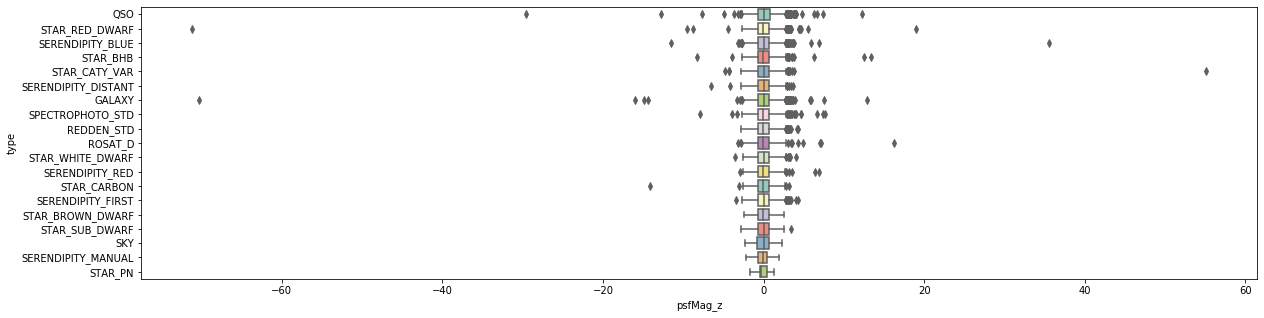

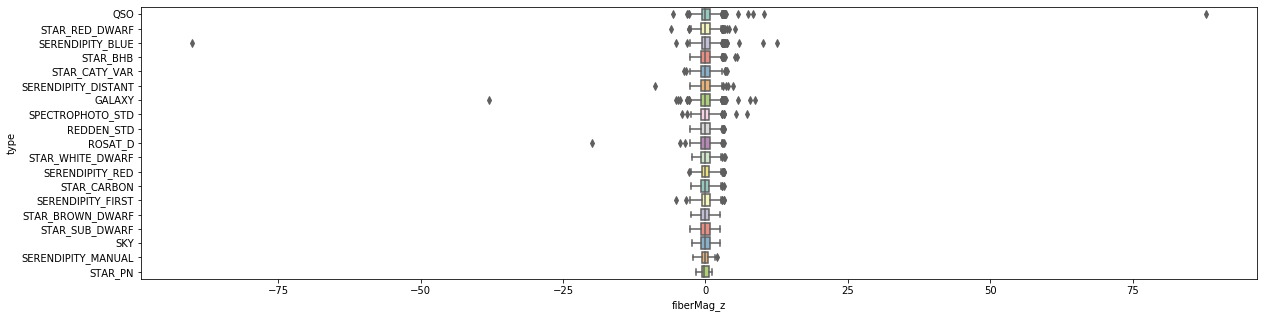

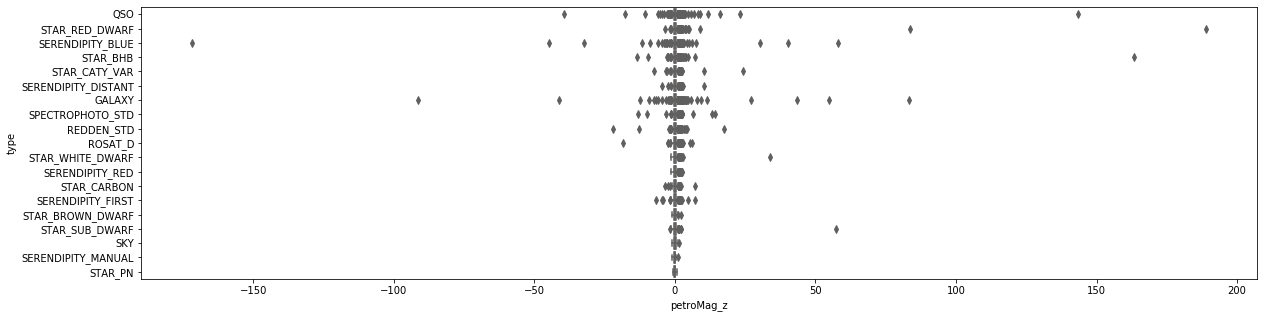

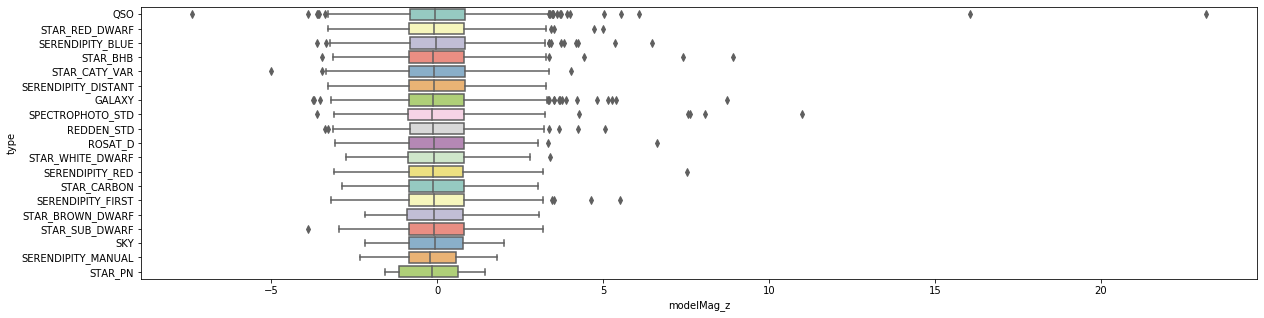

In [26]:
for s in ['u','g','r','i','z']:
  for h in ['psf', 'fiber', 'petro', 'model']:
    plt.figure(figsize=(20,5))
    plt.subplot(1,1,1)
    sns.boxplot(y="type", x="{}Mag_{}".format(h, s), data=train,palette="Set3")

In [0]:
train.drop(train[train['psfMag_u'] < -50]['psfMag_u'].index,axis=0,inplace=True)
train.drop(train[train['psfMag_u'] > 50]['psfMag_u'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['fiberMag_u'] < -20]['fiberMag_u'].index,axis=0,inplace=True)
train.drop(train[train['fiberMag_u'] > 20]['fiberMag_u'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['petroMag_u'] < -20]['petroMag_u'].index,axis=0,inplace=True)
train.drop(train[train['petroMag_u'] > 20]['petroMag_u'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['modelMag_u'] < -5]['modelMag_u'].index,axis=0,inplace=True)
train.drop(train[train['modelMag_u'] > 5]['modelMag_u'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['psfMag_g'] < -20]['psfMag_g'].index,axis=0,inplace=True)
train.drop(train[train['psfMag_g'] > 20]['psfMag_g'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['fiberMag_g'] < -10]['fiberMag_g'].index,axis=0,inplace=True)
train.drop(train[train['fiberMag_g'] > 10]['fiberMag_g'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['petroMag_g'] < -50]['petroMag_g'].index,axis=0,inplace=True)
train.drop(train[train['petroMag_g'] > 50]['petroMag_g'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['modelMag_g'] < -5]['modelMag_g'].index,axis=0,inplace=True)
train.drop(train[train['modelMag_g'] > 5]['modelMag_g'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['psfMag_r'] < -30]['psfMag_r'].index,axis=0,inplace=True)
train.drop(train[train['psfMag_r'] > 30]['psfMag_r'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['fiberMag_g'] < -10]['fiberMag_g'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['petroMag_r'] < -100]['petroMag_r'].index,axis=0,inplace=True)
train.drop(train[train['petroMag_r'] > 100]['petroMag_r'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['psfMag_i'] > 50]['psfMag_i'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['petroMag_i'] < -50]['petroMag_i'].index,axis=0,inplace=True)
train.drop(train[train['petroMag_i'] > 50]['petroMag_i'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['psfMag_z'] < -20]['psfMag_z'].index,axis=0,inplace=True)
train.drop(train[train['psfMag_z'] > 20]['psfMag_z'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['fiberMag_z'] < -20]['fiberMag_z'].index,axis=0,inplace=True)
train.drop(train[train['fiberMag_z'] > 20]['fiberMag_z'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['petroMag_z'] < -50]['petroMag_z'].index,axis=0,inplace=True)
train.drop(train[train['petroMag_z'] > 50]['petroMag_z'].index,axis=0,inplace=True)

In [0]:
train.drop(train[train['modelMag_z'] > 15]['modelMag_z'].index,axis=0,inplace=True)

In [0]:
#train.isnull().sum()

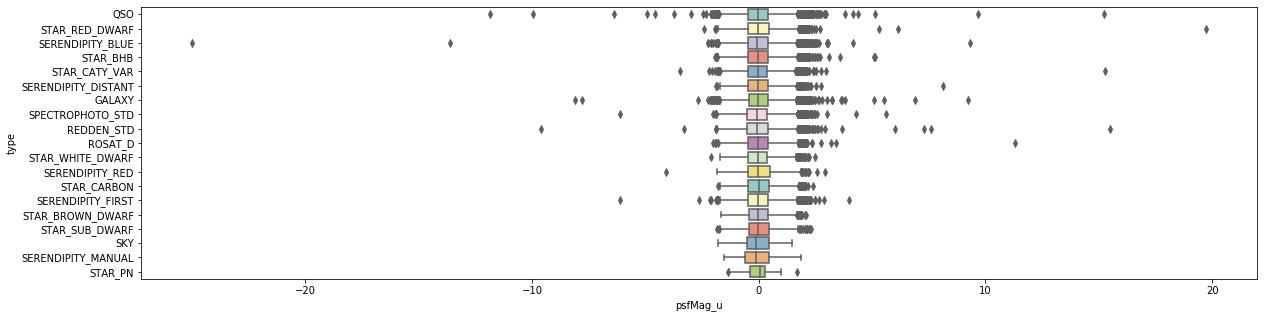

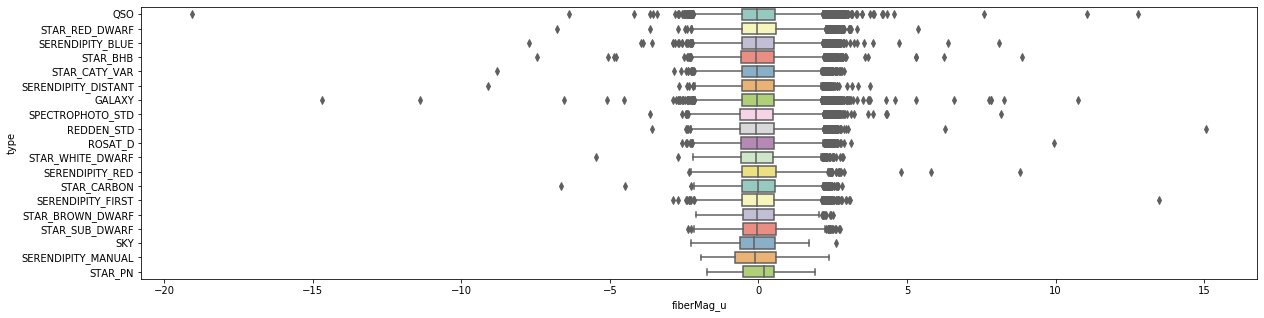

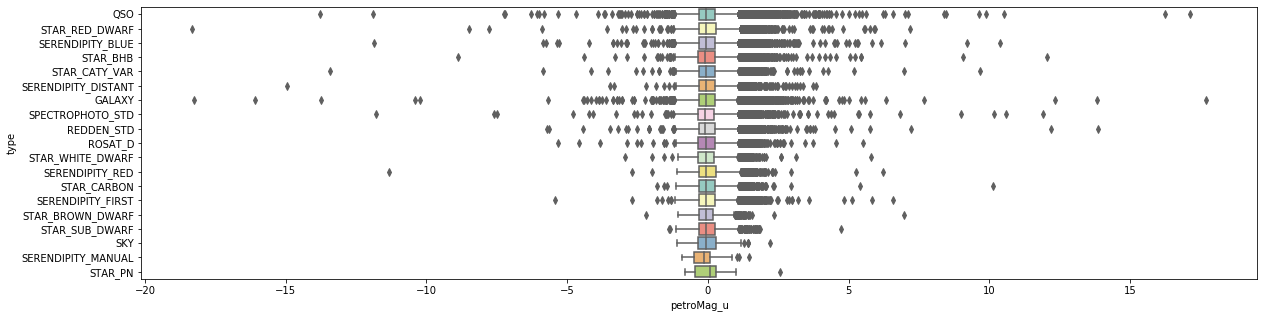

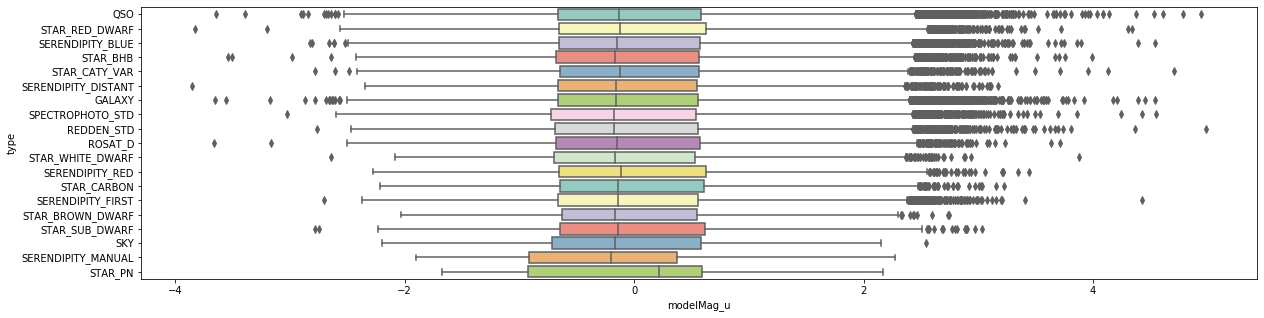

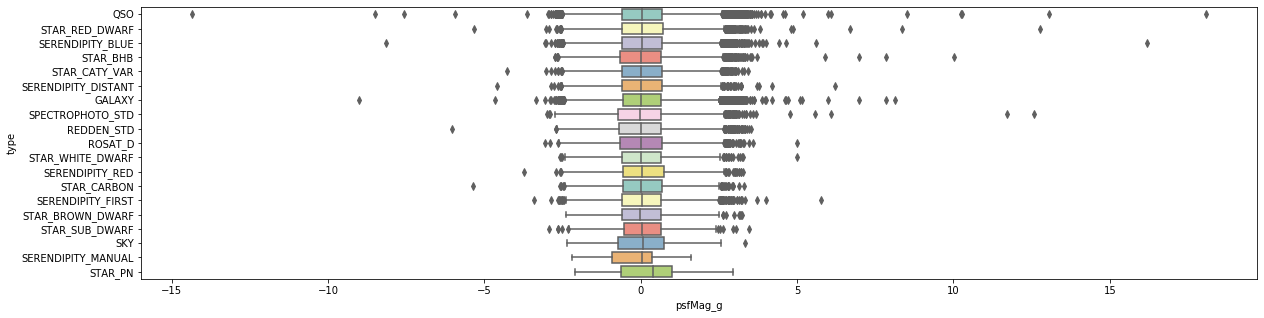

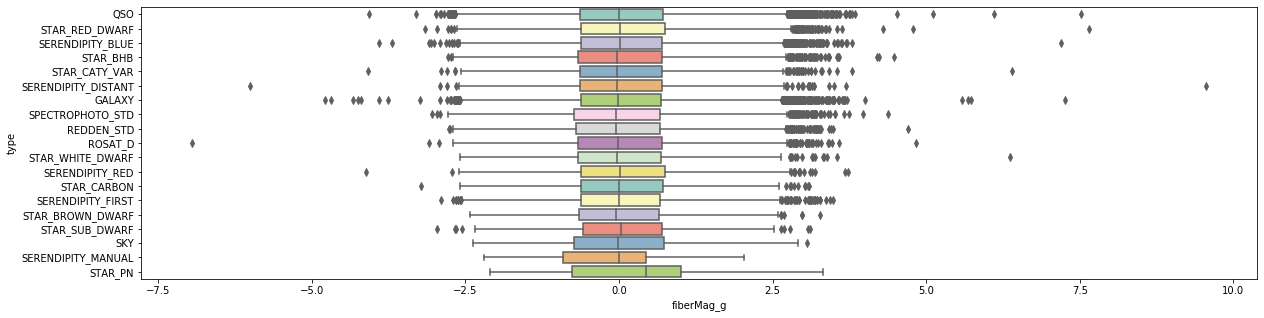

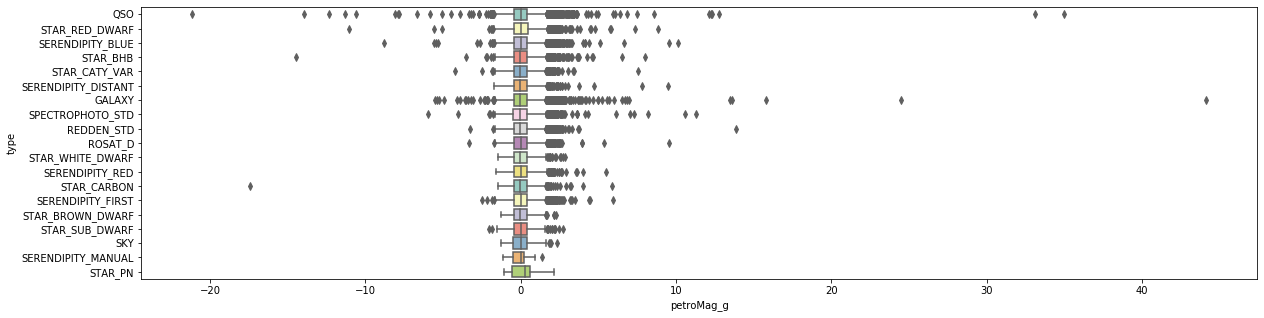

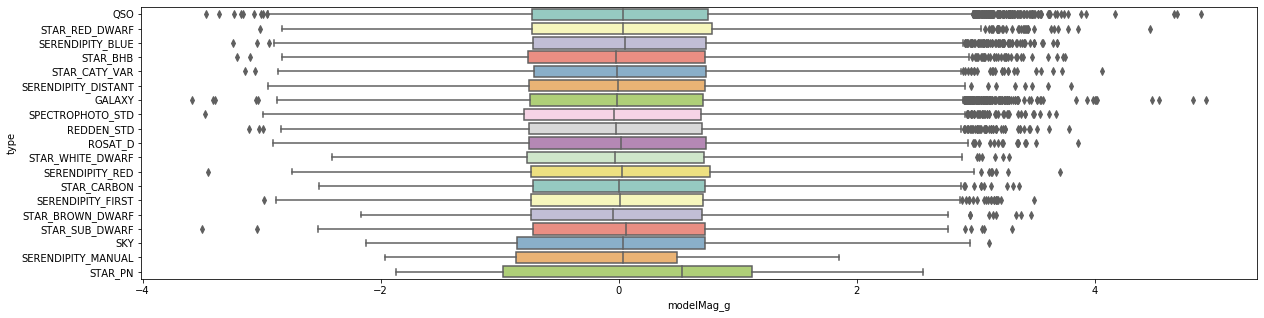

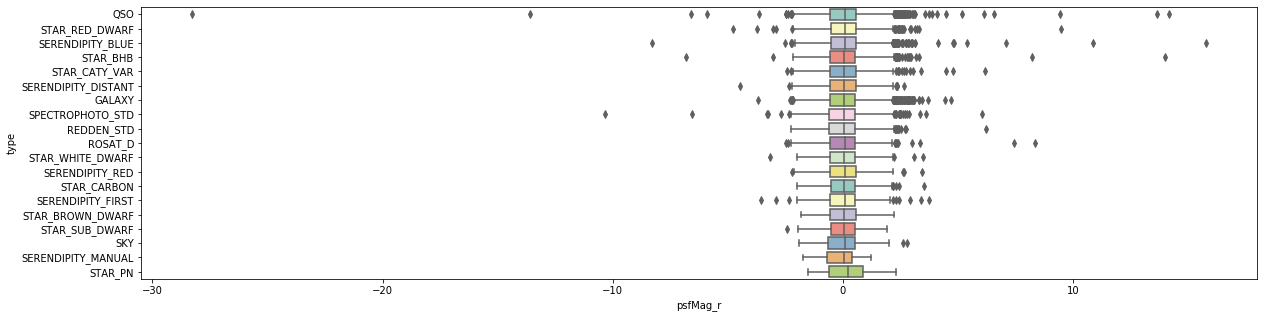

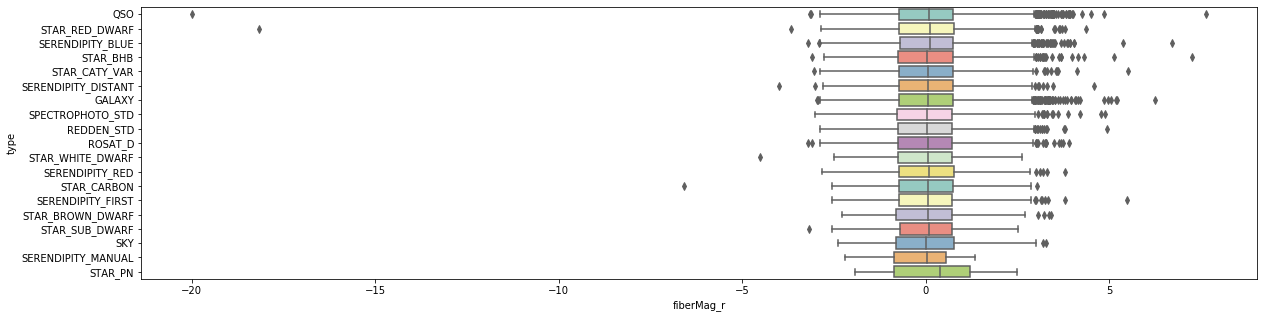

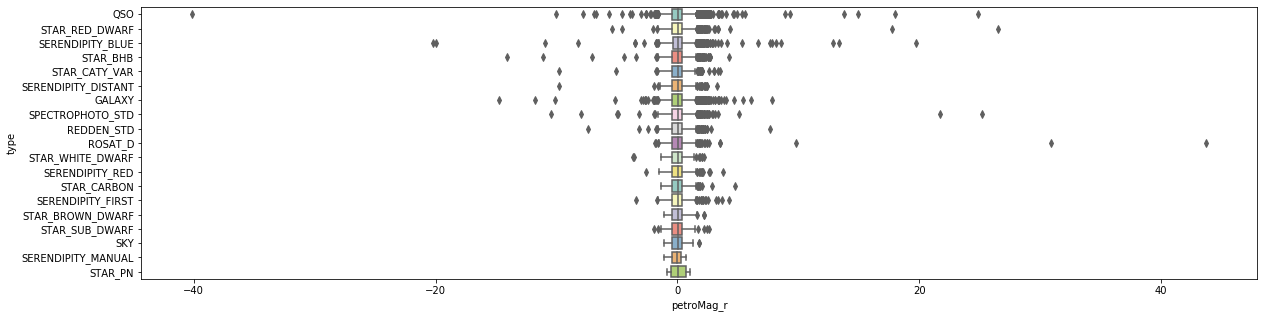

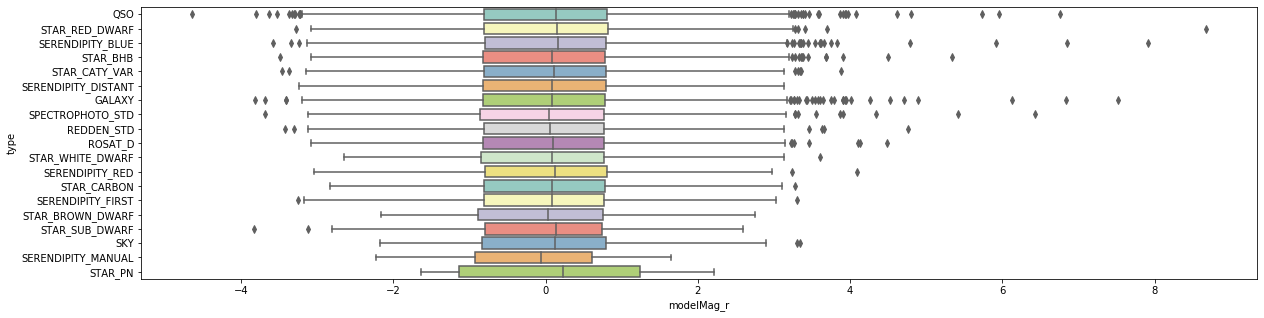

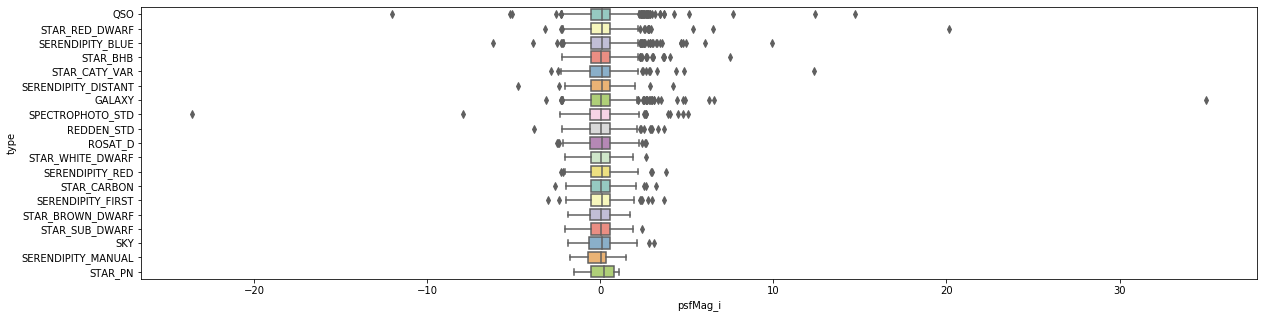

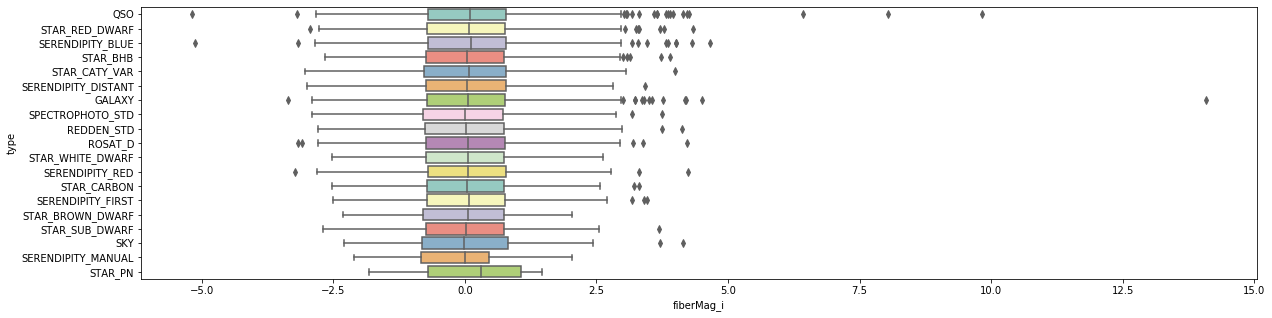

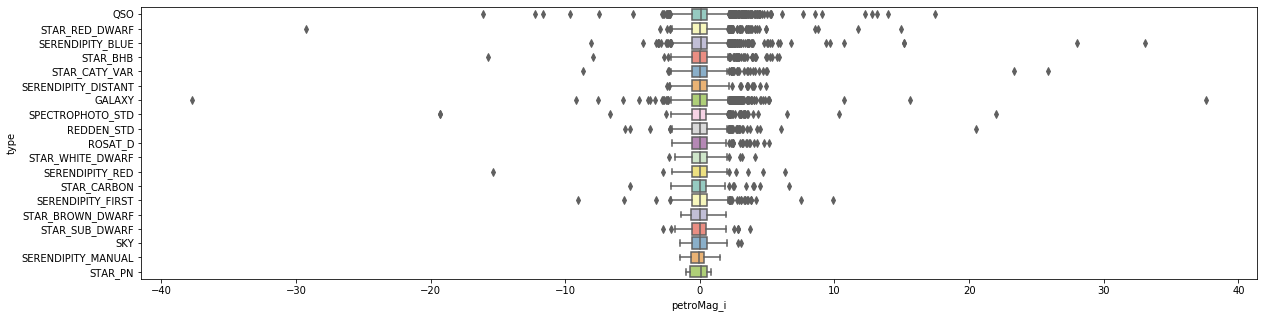

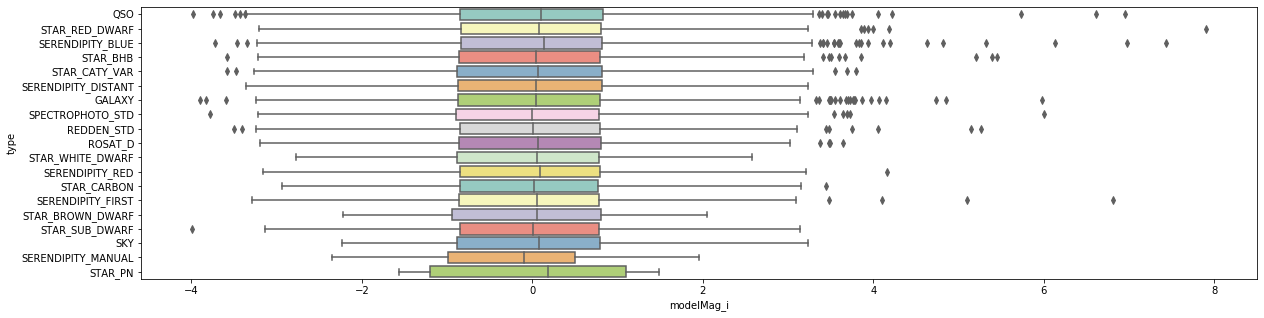

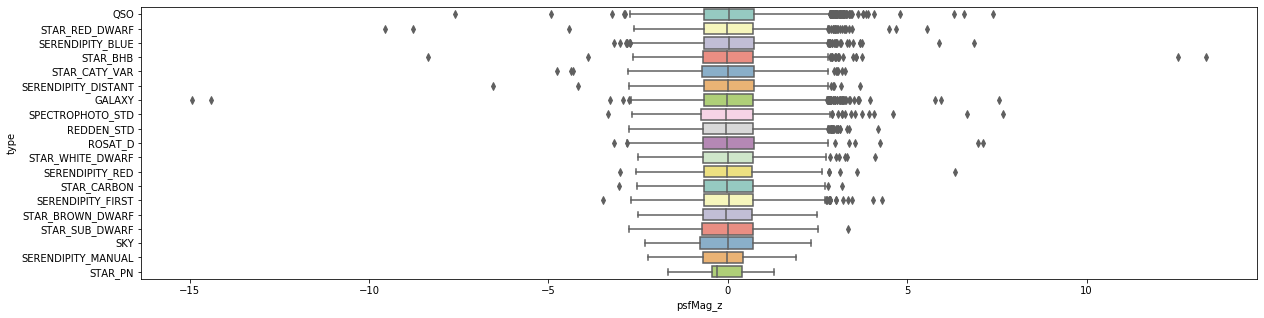

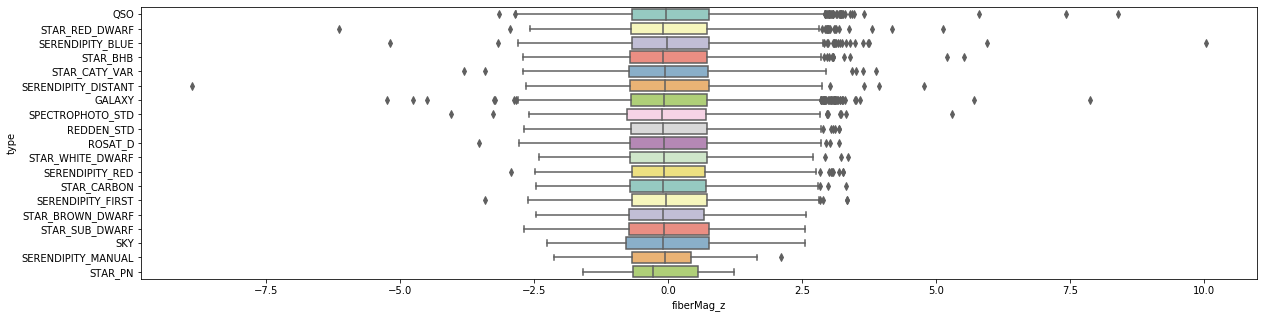

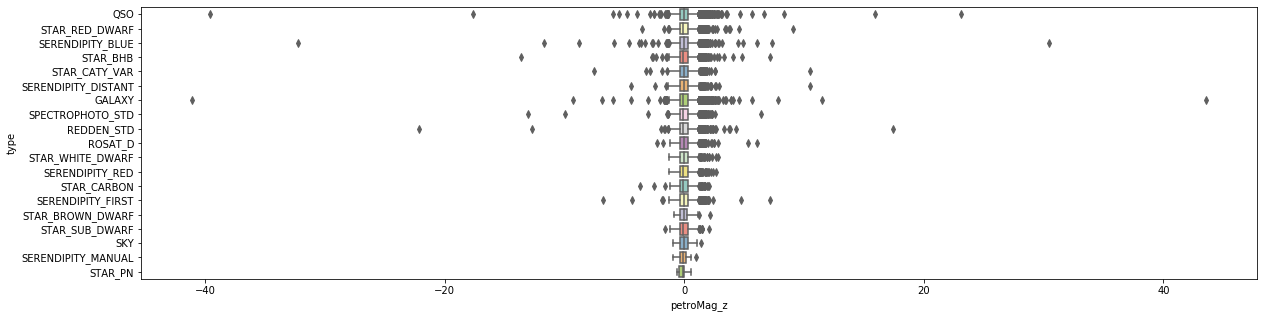

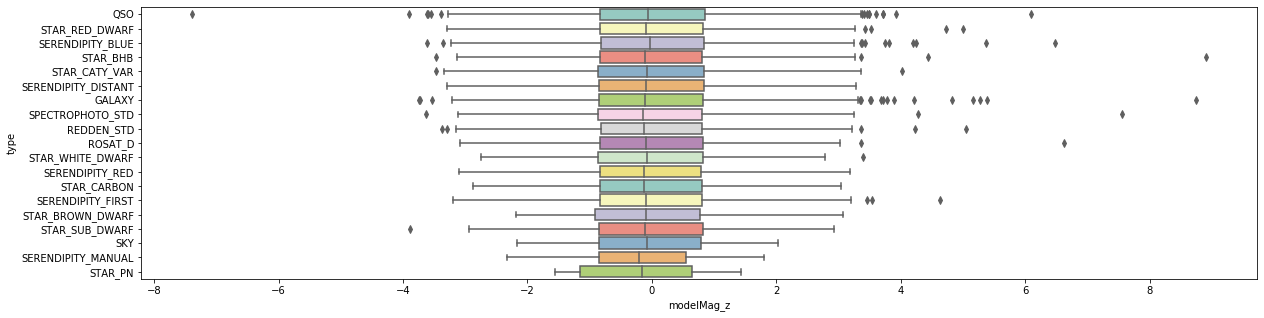

In [45]:
for s in ['u','g','r','i','z']:
  for h in ['psf', 'fiber', 'petro', 'model']:
    plt.figure(figsize=(20,5))
    plt.subplot(1,1,1)
    sns.boxplot(y="type", x="{}Mag_{}".format(h, s), data=train,palette="Set3")

In [0]:
#for s in ['u','g','r','i','z']:
#  plt.figure(figsize=(20,5))
#  plt.subplot(1,2,1)
#  sns.distplot(train['modelMag_%s'%(s)])
#  plt.subplot(1,2,2)
#  sns.distplot(test['modelMag_%s'%(s)])

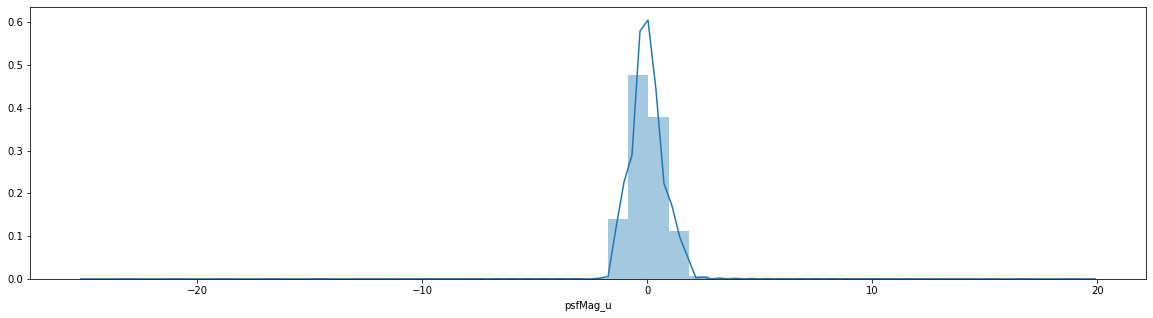

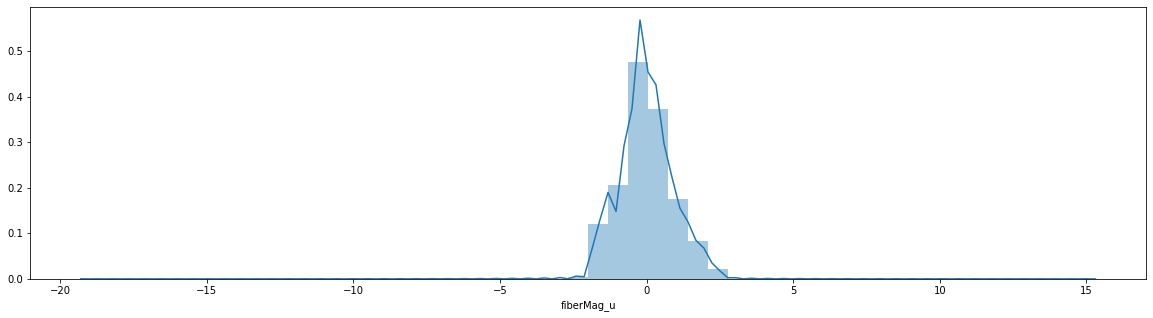

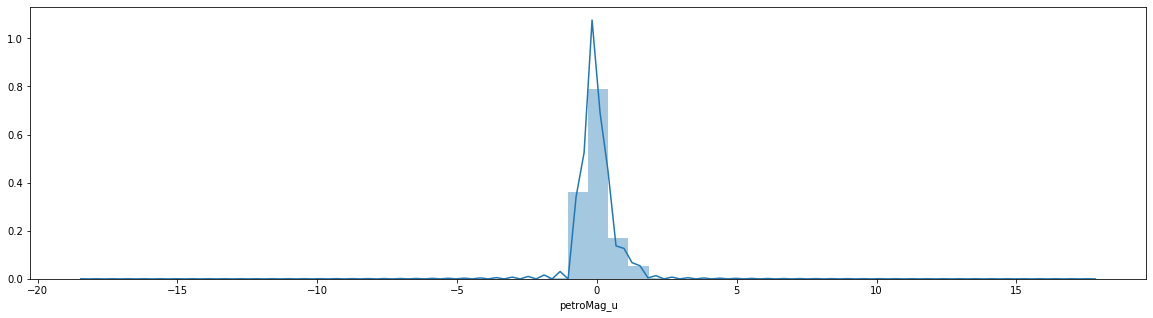

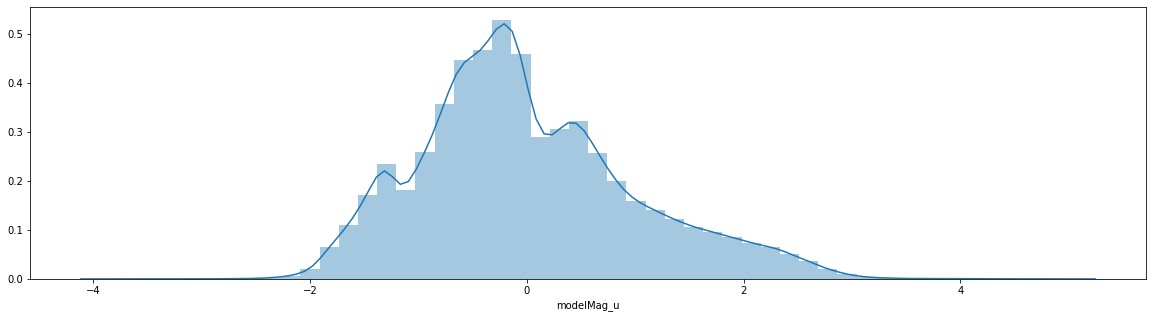

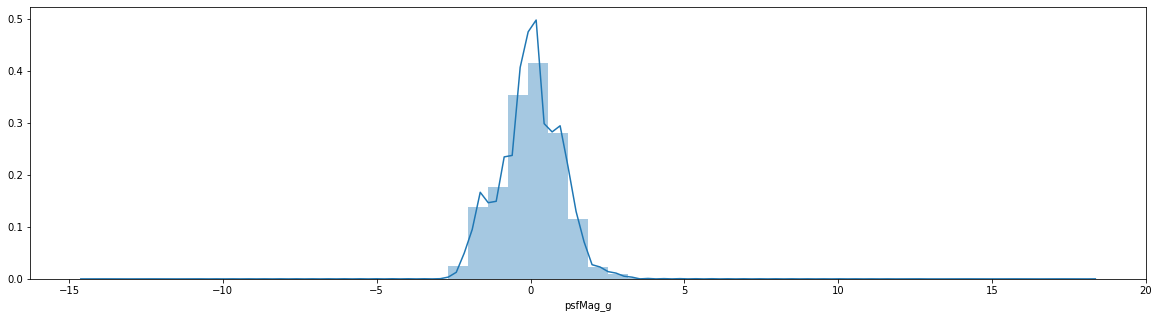

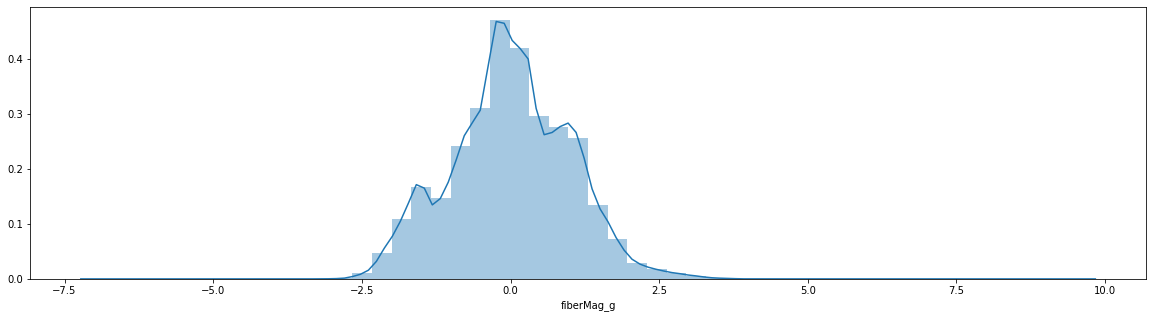

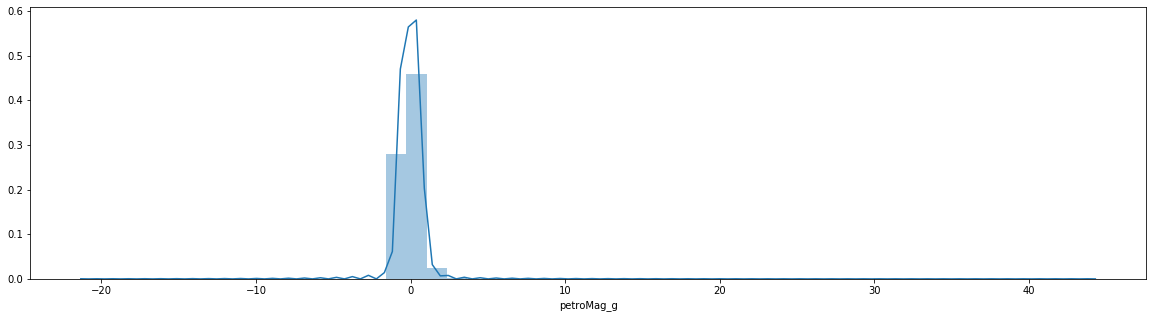

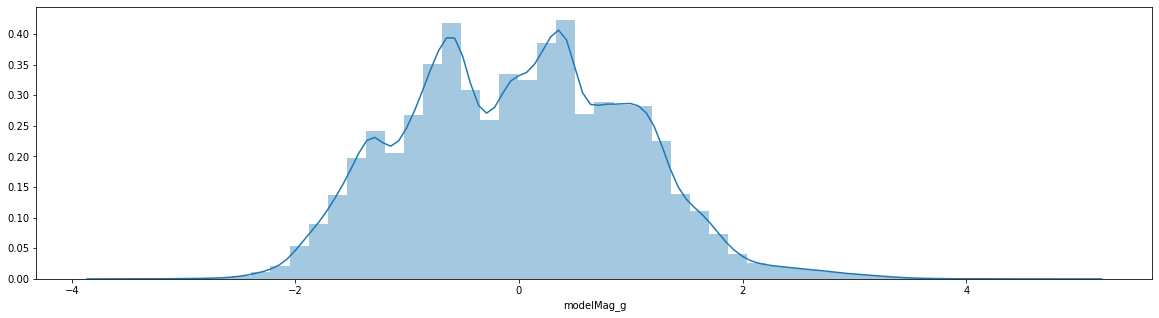

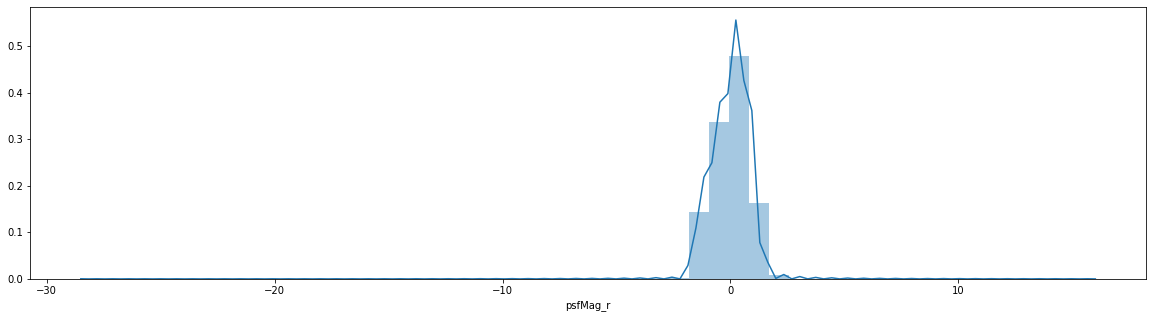

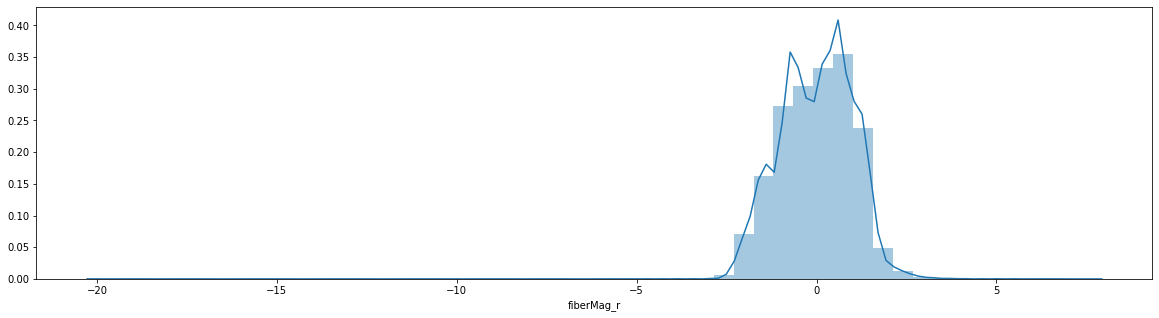

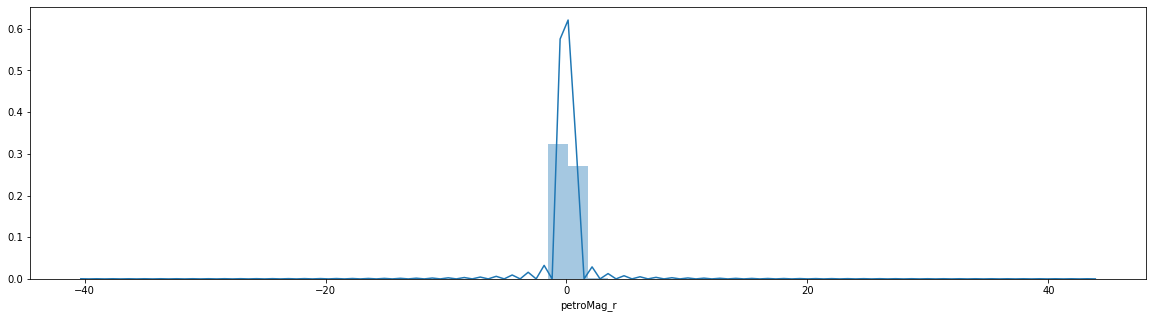

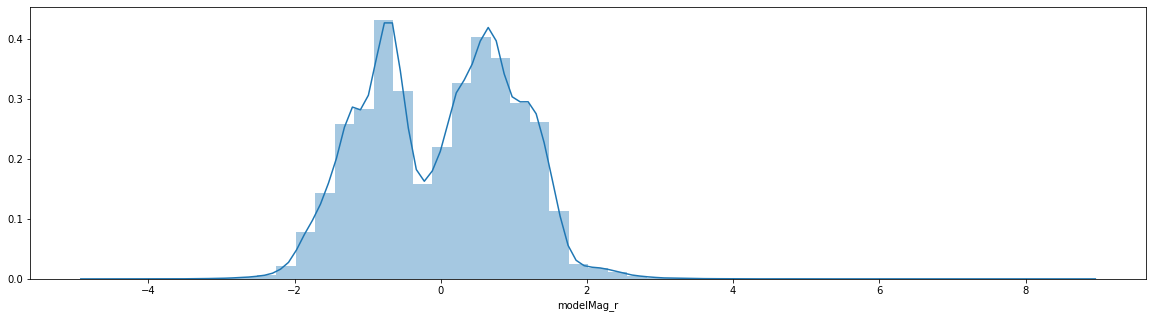

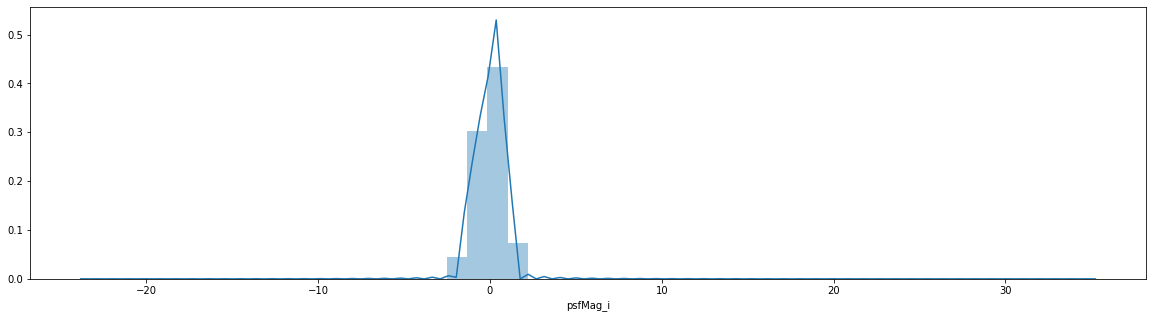

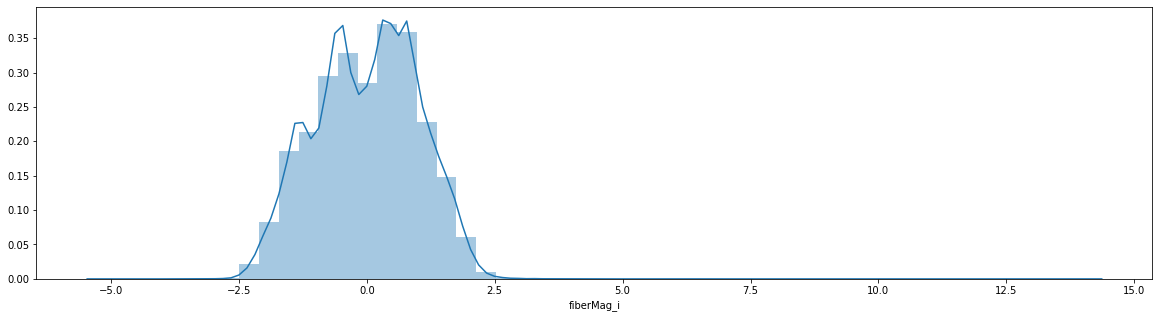

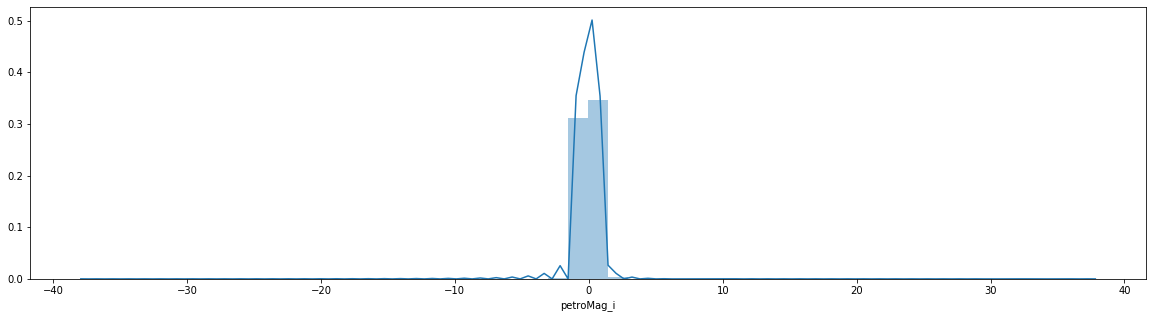

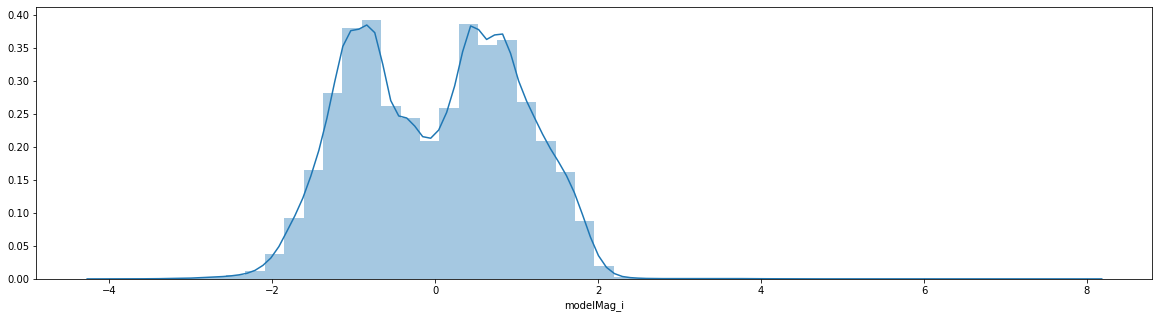

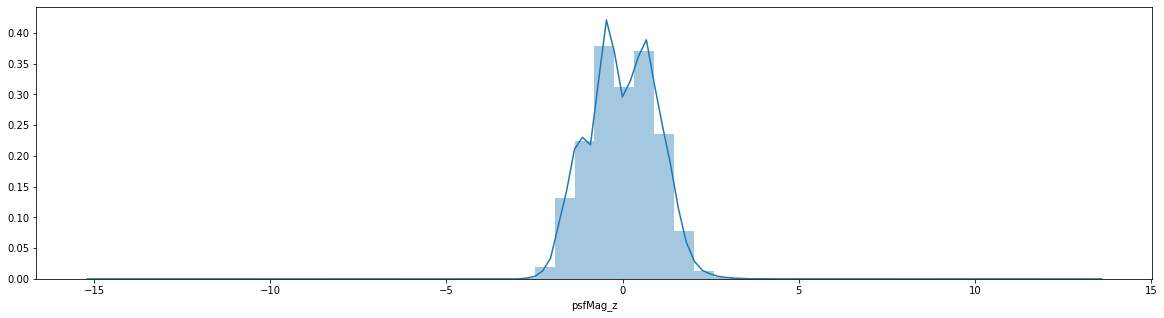

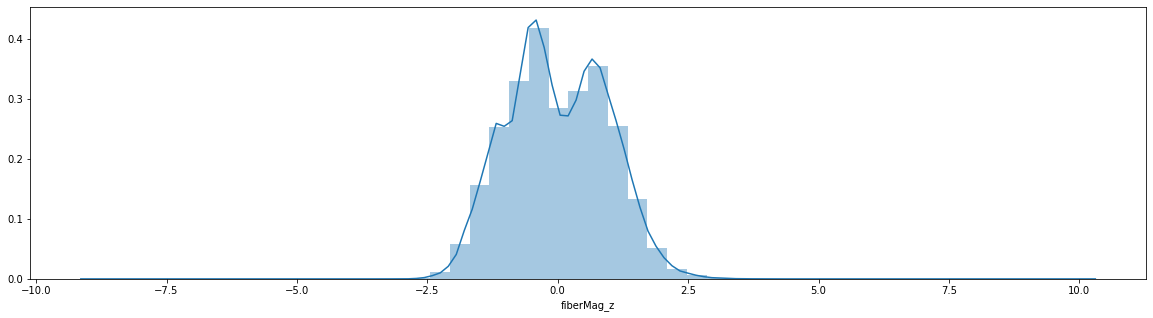

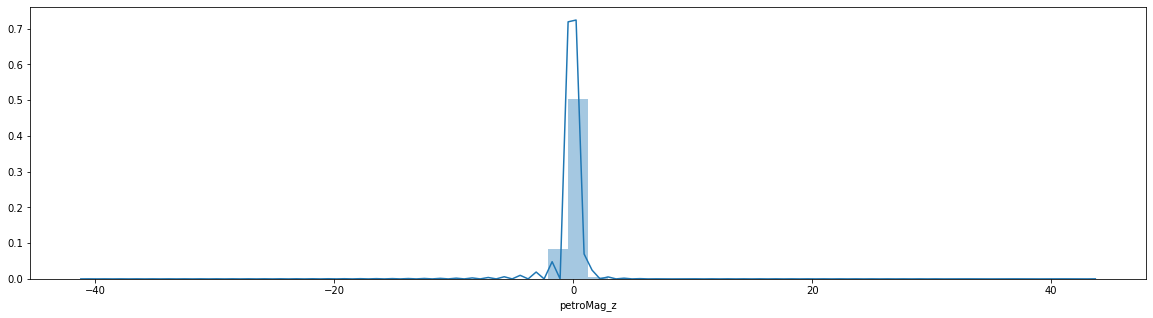

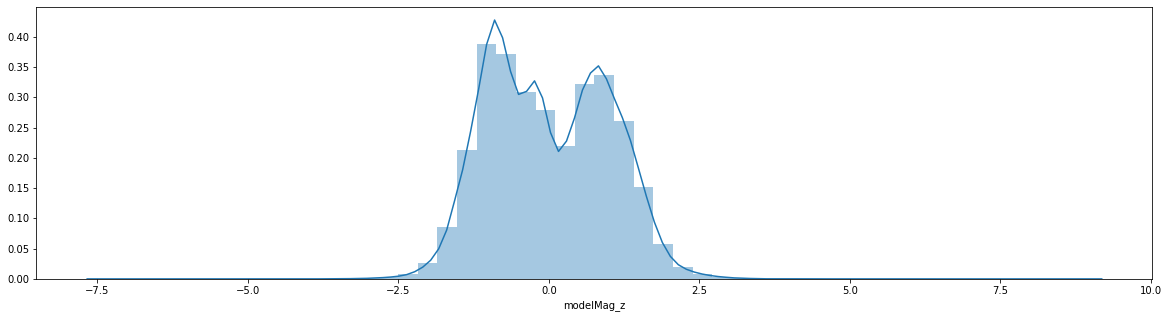

In [47]:
for s in ['u','g','r','i','z']:
  for h in ['psf', 'fiber', 'petro', 'model']:
    plt.figure(figsize=(20,5))
    sns.distplot(train[["{}Mag_{}".format(h, s)]], axlabel="{}Mag_{}".format(h,s))

In [0]:
#sns.pairplot(train.drop(["id", "fiberID"], axis=1), hue="type", diag_kind="kde")

In [0]:
X, y = train.iloc[:, 3:23].values, train.iloc[:, 1].values
X = pd.DataFrame(X)
y = pd.DataFrame(y)